# Ï£ºÏ†ú: Í∏àÎ¶¨, Î¨ºÍ∞ÄÍ∞Ä Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Ï£ºÏãù ÏãúÏû•Í≥º Í∞ÄÏÉÅÏûêÏÇ∞ ÏãúÏû•Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•


In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
from datetime import datetime, timedelta

startdate='2015-01-02'
enddate='2024-01-01'
# ÎπÑÌä∏ÏΩîÏù∏
btc=yf.download('BTC-USD', startdate, enddate, auto_adjust=True)
# Í∏àÎ¶¨
ir=yf.download('^TNX', startdate, enddate, auto_adjust=True)
# Ìà¨Ïûê Ïã¨Î¶¨
vix=yf.download('^VIX', startdate, enddate, auto_adjust=True)
# Î¨ºÍ∞Ä
cpi = pd.read_csv('./datasets/CPILFESL.csv')
# ÎÇòÏä§Îã• ÏßÄÏàò
nas=yf.download('^IXIC', startdate, enddate, auto_adjust=True)
# ÎπÑÌä∏ÏΩîÏù∏ ÎèÑÎØ∏ÎÑåÏä§
dominance = pd.read_csv('./datasets/bitcoin-dominance_(Coinmarketcap).csv')
# Ï†ÑÏÑ∏Í≥Ñ ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê
covid = pd.read_csv('./datasets/worldometer_data.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

#### Î™®Îì† Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ Í∏∞Í∞ÑÏù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê ÌÜµÏùºÏãúÏºØÎã§.

In [4]:
cpi_df = cpi[(cpi['DATE'] >= '2015-01-01') & (cpi['DATE'] <= '2023-12-31')]
cpi_df

DATE  CPILFESL
696  2015-01-01   239.811
697  2015-02-01   240.172
698  2015-03-01   240.755
699  2015-04-01   241.346
700  2015-05-01   241.688
..          ...       ...
799  2023-08-01   309.656
800  2023-09-01   310.644
801  2023-10-01   311.390
802  2023-11-01   312.349
803  2023-12-01   313.209

[108 rows x 2 columns]

In [5]:
dominance['DateTime'] = pd.to_datetime(dominance['DateTime'])
dominance['DateTime'] = dominance['DateTime'].dt.strftime('%Y-%m-%d')
dominance_df = dominance[(dominance['DateTime'] >= '2015-01-01') & (dominance['DateTime'] <= '2023-12-31')]
dominance_df


DateTime           BTC           ETH          USDT           BNB  \
87   2015-01-04  3.847140e+09  0.000000e+00  0.000000e+00  0.000000e+00   
88   2015-01-11  3.764965e+09  0.000000e+00  0.000000e+00  0.000000e+00   
89   2015-01-18  2.747723e+09  0.000000e+00  0.000000e+00  0.000000e+00   
90   2015-01-25  3.403309e+09  0.000000e+00  0.000000e+00  0.000000e+00   
91   2015-02-01  2.989457e+09  0.000000e+00  0.000000e+00  0.000000e+00   
..          ...           ...           ...           ...           ...   
552  2023-12-03  7.720445e+11  2.604175e+11  8.956680e+10  3.478286e+10   
553  2023-12-10  8.555655e+11  2.814830e+11  9.036760e+10  3.607257e+10   
554  2023-12-17  8.266443e+11  2.676788e+11  9.082720e+10  3.706691e+10   
555  2023-12-24  8.561530e+11  2.775795e+11  9.124217e+10  4.116633e+10   
556  2023-12-31  8.255528e+11  2.754523e+11  9.169827e+10  4.809682e+10   

              SOL            Í∏∞ÌÉÄ  
87   0.000000e+00  1.022340e+09  
88   0.000000e+00  9.104554e+08  
89   0.000000e+00  7.415470e+08  
90   0.000000e+00  8.121010e+08  
91   0.000000e+00  7.041131e+08  
..            ...           ...  
552  2.707359e+10  3.011843e+11  
553  3.078523e+10  3.340668e+11  
554  3.141917e+10  3.460489e+11  
555  4.604804e+10  3.640213e+11  
556  4.372154e+10  3.659356e+11  

[470 rows x 7 columns]

#### ÌïÑÏöîÏóÜÎäî ÏπºÎüºÏùÑ Ï†ïÎ¶¨ÌïòÍ≥† indexÏòÄÎçò DateÎ•º ÏπºÎüºÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ≥† ÏÉàÎ°≠Í≤å indexÎ•º Ï∂îÍ∞ÄÌñàÎã§. 

In [6]:
cpi_df.columns  =['Date', 'Cpi']
cpi_df = cpi_df.reset_index(drop='true')
cpi_df

Date      Cpi
0    2015-01-01  239.811
1    2015-02-01  240.172
2    2015-03-01  240.755
3    2015-04-01  241.346
4    2015-05-01  241.688
..          ...      ...
103  2023-08-01  309.656
104  2023-09-01  310.644
105  2023-10-01  311.390
106  2023-11-01  312.349
107  2023-12-01  313.209

[108 rows x 2 columns]

In [7]:
dominance_df.columns  =['Date','BTC','ETH','USDT','BNB','SOL','etc']
dominance_df = dominance_df.reset_index(drop='true')
dominance_df

Date           BTC           ETH          USDT           BNB  \
0    2015-01-04  3.847140e+09  0.000000e+00  0.000000e+00  0.000000e+00   
1    2015-01-11  3.764965e+09  0.000000e+00  0.000000e+00  0.000000e+00   
2    2015-01-18  2.747723e+09  0.000000e+00  0.000000e+00  0.000000e+00   
3    2015-01-25  3.403309e+09  0.000000e+00  0.000000e+00  0.000000e+00   
4    2015-02-01  2.989457e+09  0.000000e+00  0.000000e+00  0.000000e+00   
..          ...           ...           ...           ...           ...   
465  2023-12-03  7.720445e+11  2.604175e+11  8.956680e+10  3.478286e+10   
466  2023-12-10  8.555655e+11  2.814830e+11  9.036760e+10  3.607257e+10   
467  2023-12-17  8.266443e+11  2.676788e+11  9.082720e+10  3.706691e+10   
468  2023-12-24  8.561530e+11  2.775795e+11  9.124217e+10  4.116633e+10   
469  2023-12-31  8.255528e+11  2.754523e+11  9.169827e+10  4.809682e+10   

              SOL           etc  
0    0.000000e+00  1.022340e+09  
1    0.000000e+00  9.104554e+08  
2    0.000000e+00  7.415470e+08  
3    0.000000e+00  8.121010e+08  
4    0.000000e+00  7.041131e+08  
..            ...           ...  
465  2.707359e+10  3.011843e+11  
466  3.078523e+10  3.340668e+11  
467  3.141917e+10  3.460489e+11  
468  4.604804e+10  3.640213e+11  
469  4.372154e+10  3.659356e+11  

[470 rows x 7 columns]

In [8]:
covid_df = covid.drop(columns=['NewDeaths', 'Deaths/1M pop', 'NewCases' ,'Country/Region', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region'], axis=1)
covid_df

Continent    Population  TotalCases  TotalDeaths
0    North America  3.311981e+08     5032179     162804.0
1    South America  2.127107e+08     2917562      98644.0
2             Asia  1.381345e+09     2025409      41638.0
3           Europe  1.459409e+08      871894      14606.0
4           Africa  5.938157e+07      538184       9604.0
..             ...           ...         ...          ...
204  North America  4.992000e+03          13          1.0
205  North America  2.624700e+04          13          NaN
206  South America  3.489000e+03          13          NaN
207         Europe  8.010000e+02          12          NaN
208         Africa  5.986820e+05          10          1.0

[209 rows x 4 columns]

In [9]:
nasdaq_df = nas.reset_index()
display(nasdaq_df)
btc_df = btc.reset_index()
display(btc_df)
ir_df = ir.reset_index()
display(ir_df)
vix_df = vix.reset_index()
display(vix_df)
display(cpi_df)
display(dominance_df)

Date          Open          High           Low         Close  \
0    2015-01-02   4760.240234   4777.009766   4698.109863   4726.810059   
1    2015-01-05   4700.339844   4702.770020   4641.459961   4652.569824   
2    2015-01-06   4666.850098   4667.330078   4567.589844   4592.740234   
3    2015-01-07   4626.839844   4652.720215   4613.899902   4650.470215   
4    2015-01-08   4689.540039   4741.379883   4688.020020   4736.189941   
...         ...           ...           ...           ...           ...   
2259 2023-12-22  15006.179688  15047.190430  14927.120117  14992.969727   
2260 2023-12-26  15028.690430  15101.179688  15024.059570  15074.570312   
2261 2023-12-27  15089.660156  15114.080078  15051.669922  15099.179688   
2262 2023-12-28  15142.089844  15150.070312  15087.219727  15095.139648   
2263 2023-12-29  15099.200195  15111.410156  14955.370117  15011.349609   

          Volume  
0     1435150000  
1     1794470000  
2     2167320000  
3     1957950000  
4     2105450000  
...          ...  
2259  4796600000  
2260  6120600000  
2261  7480170000  
2262  5090570000  
2263  5441060000  

[2264 rows x 6 columns]

Date          Open          High           Low         Close  \
0    2015-01-02    314.079010    315.838989    313.565002    315.032013   
1    2015-01-03    314.846008    315.149994    281.082001    281.082001   
2    2015-01-04    281.145996    287.230011    257.612000    264.195007   
3    2015-01-05    265.084015    278.341003    265.084015    274.473999   
4    2015-01-06    274.610992    287.553009    272.696014    286.188995   
...         ...           ...           ...           ...           ...   
3281 2023-12-27  42518.468750  43683.160156  42167.582031  43442.855469   
3282 2023-12-28  43468.199219  43804.781250  42318.550781  42627.855469   
3283 2023-12-29  42614.644531  43124.324219  41424.062500  42099.402344   
3284 2023-12-30  42091.753906  42584.125000  41556.226562  42156.902344   
3285 2023-12-31  42152.097656  42860.937500  41998.253906  42265.187500   

           Volume  
0         7860650  
1        33054400  
2        55629100  
3        43962800  
4        23245700  
...           ...  
3281  25260941032  
3282  22992093014  
3283  26000021055  
3284  16013925945  
3285  16397498810  

[3286 rows x 6 columns]

Date   Open   High    Low  Close  Volume
0    2015-01-02  2.197  2.213  2.102  2.123       0
1    2015-01-05  2.102  2.109  2.037  2.039       0
2    2015-01-06  1.968  1.997  1.889  1.963       0
3    2015-01-07  1.975  2.008  1.938  1.954       0
4    2015-01-08  2.004  2.030  1.988  2.016       0
...         ...    ...    ...    ...    ...     ...
2258 2023-12-22  3.852  3.919  3.849  3.901       0
2259 2023-12-26  3.908  3.908  3.882  3.886       0
2260 2023-12-27  3.852  3.852  3.785  3.789       0
2261 2023-12-28  3.818  3.861  3.800  3.850       0
2262 2023-12-29  3.879  3.898  3.847  3.866       0

[2263 rows x 6 columns]

Date       Open       High        Low      Close  Volume
0    2015-01-02  17.760000  20.139999  17.049999  17.790001       0
1    2015-01-05  19.190001  21.290001  19.190001  19.920000       0
2    2015-01-06  20.330000  22.900000  19.520000  21.120001       0
3    2015-01-07  20.150000  20.719999  19.040001  19.309999       0
4    2015-01-08  17.930000  18.090000  16.990000  17.010000       0
...         ...        ...        ...        ...        ...     ...
2259 2023-12-22  13.720000  13.960000  13.000000  13.030000       0
2260 2023-12-26  13.770000  13.800000  12.960000  12.990000       0
2261 2023-12-27  13.020000  13.040000  12.370000  12.430000       0
2262 2023-12-28  12.440000  12.650000  12.380000  12.470000       0
2263 2023-12-29  12.550000  13.190000  12.360000  12.450000       0

[2264 rows x 6 columns]

Date      Cpi
0    2015-01-01  239.811
1    2015-02-01  240.172
2    2015-03-01  240.755
3    2015-04-01  241.346
4    2015-05-01  241.688
..          ...      ...
103  2023-08-01  309.656
104  2023-09-01  310.644
105  2023-10-01  311.390
106  2023-11-01  312.349
107  2023-12-01  313.209

[108 rows x 2 columns]

Date           BTC           ETH          USDT           BNB  \
0    2015-01-04  3.847140e+09  0.000000e+00  0.000000e+00  0.000000e+00   
1    2015-01-11  3.764965e+09  0.000000e+00  0.000000e+00  0.000000e+00   
2    2015-01-18  2.747723e+09  0.000000e+00  0.000000e+00  0.000000e+00   
3    2015-01-25  3.403309e+09  0.000000e+00  0.000000e+00  0.000000e+00   
4    2015-02-01  2.989457e+09  0.000000e+00  0.000000e+00  0.000000e+00   
..          ...           ...           ...           ...           ...   
465  2023-12-03  7.720445e+11  2.604175e+11  8.956680e+10  3.478286e+10   
466  2023-12-10  8.555655e+11  2.814830e+11  9.036760e+10  3.607257e+10   
467  2023-12-17  8.266443e+11  2.676788e+11  9.082720e+10  3.706691e+10   
468  2023-12-24  8.561530e+11  2.775795e+11  9.124217e+10  4.116633e+10   
469  2023-12-31  8.255528e+11  2.754523e+11  9.169827e+10  4.809682e+10   

              SOL           etc  
0    0.000000e+00  1.022340e+09  
1    0.000000e+00  9.104554e+08  
2    0.000000e+00  7.415470e+08  
3    0.000000e+00  8.121010e+08  
4    0.000000e+00  7.041131e+08  
..            ...           ...  
465  2.707359e+10  3.011843e+11  
466  3.078523e+10  3.340668e+11  
467  3.141917e+10  3.460489e+11  
468  4.604804e+10  3.640213e+11  
469  4.372154e+10  3.659356e+11  

[470 rows x 7 columns]

#### Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏ÌïòÏòÄÎã§.

In [10]:
print(nasdaq_df.isna().sum())
print(btc_df.isna().sum())
print(ir_df.isna().sum())
print(vix_df.isna().sum())
print(cpi_df.isna().sum())
print(dominance_df.isna().sum())
print(covid_df.isna().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date    0
Cpi     0
dtype: int64
Date    0
BTC     0
ETH     0
USDT    0
BNB     0
SOL     0
etc     0
dtype: int64
Continent       1
Population      1
TotalCases      0
TotalDeaths    21
dtype: int64


#### Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìïú Í≤∞Í≥º covid_dfÏóêÎßå Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏóàÍ≥† Ï†úÏùº ÌÅ∞ Îã®ÏúÑÏù∏ ContinentÏùò Í≤∞Ï∏°ÏπòÎ•º Ï†úÍ±∞Ìïú Îí§ Îã§Ïãú ÌôïÏù∏Ìï¥ Î≥¥ÏïòÎã§.

In [11]:
covid_df = covid_df[~covid_df['Continent'].isna()]
covid_df.isna().sum()

Continent       0
Population      0
TotalCases      0
TotalDeaths    21
dtype: int64

#### Í∑∏ÎüºÏóêÎèÑ TotalDeaths ÏπºÎüºÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÎÇ®ÏïÑÏûàÏñ¥ 0ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÏòÄÎã§.

In [12]:
covid_df.fillna(0, inplace=True)
covid_df.isna().sum()

C:\Users\qortl\AppData\Local\Temp\ipykernel_43516\3283445809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df.fillna(0, inplace=True)


Continent      0
Population     0
TotalCases     0
TotalDeaths    0
dtype: int64

#### Ï§ëÎ≥µÌñâÏùÄ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïòÎã§.

In [13]:
print(nasdaq_df.duplicated().sum())
print(btc_df.duplicated().sum())
print(ir_df.duplicated().sum())
print(vix_df.duplicated().sum())
print(cpi_df.duplicated().sum())
print(dominance_df.duplicated().sum())
print(covid_df.duplicated().sum())

0
0
0
0
0
0
0


### ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ïó¨Îü¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï†ïÍ∑úÌôî ÌïòÏòÄÎã§.

In [14]:
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'])
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
dominance_df['Date'] = pd.to_datetime(dominance_df['Date'])

In [15]:
from sklearn.preprocessing import MinMaxScaler

btc_scale = MinMaxScaler()
btc_df[['Open', 'High', 'Low', 'Close', 'Volume']] = btc_scale.fit_transform(btc_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(btc_df)

cpi_scale = MinMaxScaler()
cpi_df[['Cpi']] = cpi_scale.fit_transform(cpi_df[['Cpi']])
display(cpi_df)

ir_scale = MinMaxScaler()
ir_df[['Open', 'High', 'Low', 'Close', 'Volume']] = ir_scale.fit_transform(ir_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(ir_df)

nas_scale = MinMaxScaler()
nasdaq_df[['Open', 'High', 'Low', 'Close', 'Volume']] = nas_scale.fit_transform(nasdaq_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(nasdaq_df)

vix_scale = MinMaxScaler()
vix_df[['Open', 'High', 'Low', 'Close', 'Volume']] = vix_scale.fit_transform(vix_df[['Open', 'High', 'Low', 'Close', 'Volume']])
vix_df['Close'] = 1 - vix_df['Close']
display(vix_df)

#Î≥ÑÎèÑÎ°ú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ï†ïÍ∑úÌôîÎ•º Îî∞Î°ú ÌïòÏßÄ ÏïäÏùå
dominance_df.iloc[:, 1:] = dominance_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
display(dominance_df)

Date      Open      High       Low     Close    Volume
0    2015-01-02  0.002036  0.001518  0.002146  0.002032  0.000000
1    2015-01-03  0.002048  0.001508  0.001655  0.001528  0.000072
2    2015-01-04  0.001547  0.001101  0.001300  0.001278  0.000136
3    2015-01-05  0.001309  0.000971  0.001413  0.001430  0.000103
4    2015-01-06  0.001450  0.001106  0.001528  0.001604  0.000044
...         ...       ...       ...       ...       ...       ...
3281 2023-12-27  0.628467  0.633899  0.634281  0.642018  0.071954
3282 2023-12-28  0.642563  0.635672  0.636561  0.629924  0.065490
3283 2023-12-29  0.629894  0.625750  0.623051  0.622082  0.074060
3284 2023-12-30  0.622133  0.617872  0.625047  0.622935  0.045607
3285 2023-12-31  0.623029  0.621909  0.631723  0.624542  0.046699

[3286 rows x 6 columns]

Date       Cpi
0   2015-01-01  0.000000
1   2015-02-01  0.004918
2   2015-03-01  0.012861
3   2015-04-01  0.020913
4   2015-05-01  0.025573
..         ...       ...
103 2023-08-01  0.951593
104 2023-09-01  0.965054
105 2023-10-01  0.975217
106 2023-11-01  0.988283
107 2023-12-01  1.000000

[108 rows x 2 columns]

Date      Open      High       Low     Close  Volume
0    2015-01-02  0.379570  0.375645  0.379004  0.361773     0.0
1    2015-01-05  0.358520  0.352321  0.364546  0.343061     0.0
2    2015-01-06  0.328828  0.327203  0.331628  0.326131     0.0
3    2015-01-07  0.330379  0.329670  0.342527  0.324126     0.0
4    2015-01-08  0.336805  0.334604  0.353648  0.337937     0.0
...         ...       ...       ...       ...       ...     ...
2258 2023-12-22  0.746288  0.758242  0.767571  0.757853     0.0
2259 2023-12-26  0.758697  0.755775  0.774911  0.754511     0.0
2260 2023-12-27  0.746288  0.743216  0.753336  0.732903     0.0
2261 2023-12-28  0.738755  0.745234  0.756673  0.746491     0.0
2262 2023-12-29  0.752271  0.753532  0.767126  0.750056     0.0

[2263 rows x 6 columns]

Date      Open      High       Low     Close    Volume
0    2015-01-02  0.045490  0.040590  0.041359  0.039012  0.066726
1    2015-01-05  0.040458  0.034361  0.036562  0.032715  0.099648
2    2015-01-06  0.037644  0.031388  0.030305  0.027641  0.133810
3    2015-01-07  0.034282  0.030162  0.034227  0.032537  0.114627
4    2015-01-08  0.039550  0.037600  0.040505  0.039807  0.128141
...         ...       ...       ...       ...       ...       ...
2259 2023-12-22  0.906341  0.902254  0.907676  0.909719  0.374712
2260 2023-12-26  0.908232  0.906783  0.915886  0.916640  0.496020
2261 2023-12-27  0.913355  0.907866  0.918225  0.918727  0.620588
2262 2023-12-28  0.917760  0.910885  0.921235  0.918384  0.401646
2263 2023-12-29  0.914156  0.907642  0.910069  0.911278  0.433759

[2264 rows x 6 columns]

Date      Open      High       Low     Close  Volume
0    2015-01-02  0.118757  0.142201  0.137356  0.882393     0.0
1    2015-01-05  0.138165  0.157300  0.171979  0.853433     0.0
2    2015-01-06  0.153637  0.178440  0.177318  0.837118     0.0
3    2015-01-07  0.151194  0.149816  0.169552  0.861727     0.0
4    2015-01-08  0.121064  0.115284  0.136386  0.892998     0.0
...         ...       ...       ...       ...       ...     ...
2259 2023-12-22  0.063925  0.061056  0.071833  0.947111     0.0
2260 2023-12-26  0.064604  0.058955  0.071186  0.947655     0.0
2261 2023-12-27  0.054425  0.048976  0.061641  0.955269     0.0
2262 2023-12-28  0.046553  0.043855  0.061802  0.954725     0.0
2263 2023-12-29  0.048046  0.050945  0.061479  0.954997     0.0

[2264 rows x 6 columns]

Date           BTC           ETH          USDT           BNB  \
0   2015-01-04  3.847140e+09  0.000000e+00  0.000000e+00  0.000000e+00   
1   2015-01-11  3.764965e+09  0.000000e+00  0.000000e+00  0.000000e+00   
2   2015-01-18  2.747723e+09  0.000000e+00  0.000000e+00  0.000000e+00   
3   2015-01-25  3.403309e+09  0.000000e+00  0.000000e+00  0.000000e+00   
4   2015-02-01  2.989457e+09  0.000000e+00  0.000000e+00  0.000000e+00   
..         ...           ...           ...           ...           ...   
465 2023-12-03  7.720445e+11  2.604175e+11  8.956680e+10  3.478286e+10   
466 2023-12-10  8.555655e+11  2.814830e+11  9.036760e+10  3.607257e+10   
467 2023-12-17  8.266443e+11  2.676788e+11  9.082720e+10  3.706691e+10   
468 2023-12-24  8.561530e+11  2.775795e+11  9.124217e+10  4.116633e+10   
469 2023-12-31  8.255528e+11  2.754523e+11  9.169827e+10  4.809682e+10   

              SOL           etc  
0    0.000000e+00  1.022340e+09  
1    0.000000e+00  9.104554e+08  
2    0.000000e+00  7.415470e+08  
3    0.000000e+00  8.121010e+08  
4    0.000000e+00  7.041131e+08  
..            ...           ...  
465  2.707359e+10  3.011843e+11  
466  3.078523e+10  3.340668e+11  
467  3.141917e+10  3.460489e+11  
468  4.604804e+10  3.640213e+11  
469  4.372154e+10  3.659356e+11  

[470 rows x 7 columns]

## Í∏àÎ¶¨, Î¨ºÍ∞ÄÍ∞Ä Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Ï£ºÏãù ÏãúÏû•Í≥º Í∞ÄÏÉÅÏûêÏÇ∞ ÏãúÏû•Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•

**Ï£ºÏãù Ï†ÑÏ≤¥ ÏãúÏû•ÏùÑ ÎπÑÍµêÌïòÍ∏∞ Î≥¥Îã§Îäî Ï†ÑÏ≤¥ Ï£ºÏãùÏãúÏû• Ï§ë ÎπÑÏ§ëÏù¥ Í∑úÎ™®Í∞Ä Í∞ÄÏû• ÌÅ∞ NASDAQÏúºÎ°ú ÎπÑÍµêÌïòÎäî Í≤ÉÏù¥ Ï†ÅÌï©ÌïòÎã§Í≥† ÌåêÎã®ÌñàÎã§.
Í∞ÄÏÉÅÏûêÏÇ∞ Ïó≠Ïãú Í∞ÄÏÉÅÏûêÏÇ∞ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌïòÍ∏∞ Î≥¥Îã§Îäî Í∞ÄÏÉÅÏûêÏÇ∞Ï§ë Í∑úÎ™®Í∞Ä Í∞ÄÏû• ÌÅ∞ ÎπÑÌä∏ÏΩîÏù∏ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÍ∏∞Î°ú ÌñàÎã§.**

### 1. NASDAQÍ≥º ÎπÑÌä∏ÏΩîÏù∏Ïùò Í∞ÄÍ≤©ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ìïú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÎëòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï¥ Î≥¥Ïûê
- Ï£ºÏãùÍ≥º Í∞ÄÏÉÅÏûêÏÇ∞Ïù¥ ÎπÑÏä∑Ìïú ÏõÄÏßÅÏûÑÏùÑ Î≥¥Ïù¥ÎäîÏßÄ ÌôïÏù∏
- ÎπÑÏä∑Ìïú ÏõÄÏßÅÏûÑÏùÑ Î≥¥Ïù∏ ÏßÄÏ†êÍ≥º Í∑∏Î†áÏßÄ ÏïäÏùÄ ÏßÄÏ†êÏùò ÏõêÏù∏ÏùÑ Î∂ÑÏÑù
- Í∏àÎ¶¨, Î¨ºÍ∞ÄÏôÄ Í¥ÄÎ†®ÏßÄÏñ¥ Î∂ÑÏÑù

### ‚ùì Í∞ÄÏÑ§
- Ï£ºÏãùÏãúÏû•Í≥º Í∞ÄÏÉÅÏûêÏÇ∞ ÏãúÏû•Ïùò Í∞ÄÍ≤© ÌùêÎ¶ÑÏùÄ Ïù¥ Îëò Î™®Îëê ÏûêÏÇ∞Ïùò ÌòïÌÉúÎ•º ÎùÑÍ∏∞ ÎïåÎ¨∏Ïóê ÎπÑÏä∑Ìïú ÏõÄÏßÅÏûÑÏùÑ Î≥¥Ïó¨Ï§Ñ Í≤ÉÏù¥Îã§.


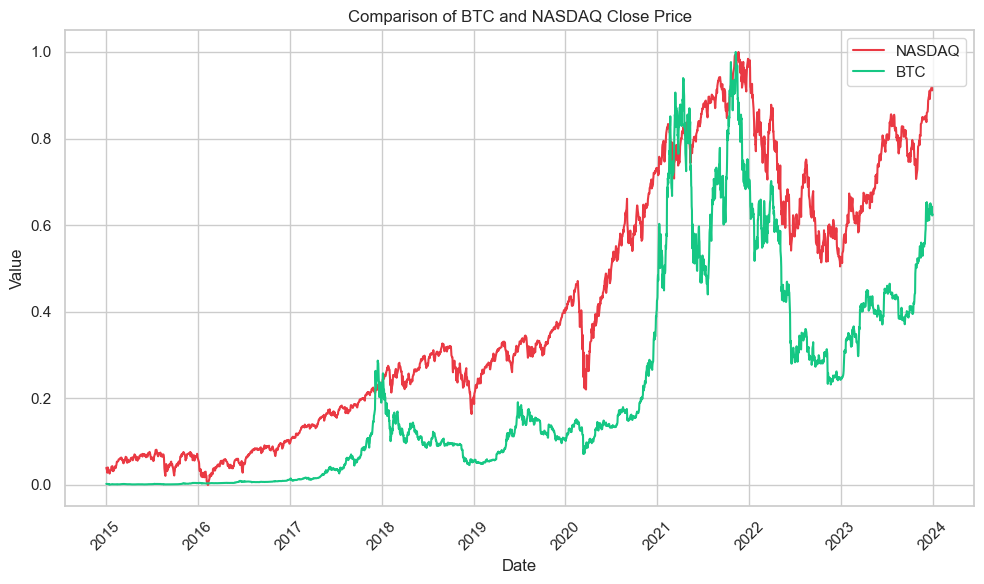

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=nasdaq_df['Date'], y=nasdaq_df['Close'], label='NASDAQ', color='#ea3943')
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of BTC and NASDAQ Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### üìå Î∂ÑÏÑù Í≤∞Í≥º
  - ÎπÑÏä∑Ìïú Î∂ÄÎ∂Ñ
    - 2015ÎÖÑ ~ 2024ÎÖÑÍπåÏßÄ ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏Ïùò Í∞ÄÍ≤©Ïù¥ Î™®Îëê Ïö∞ÏÉÅÌñ•ÌïúÎã§Îäî Ï†êÏù¥ Í∞ôÎã§.
    - ÎπÑÏä∑Ìïú ÏãúÍ∏∞(2017ÎÖÑ, 2021ÎÖÑ)Ïóê ÏÉÅÏäπÌïòÍ≥† ÎπÑÏä∑Ìïú ÏãúÍ∏∞(2020ÎÖÑ, 2022ÎÖÑ)Ïóê ÌïòÎùΩÌïòÎäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.
  - Îã§Î•∏ Î∂ÄÎ∂Ñ
    - 2018ÎÖÑÏóê Ï£ºÏãùÏãúÏû•ÏùÑ Ï£ºÎ™©Ìï†ÎßåÌïú Î≥ÄÎèôÏÑ±Ïúº Î≥¥Ïó¨Ï£ºÏßÄ ÏïäÏïòÏßÄÎßå, ÎπÑÌä∏ÏΩîÏù∏ÏùÄ Í∏âÎì±ÌñàÎã§.
    - 2020ÎÖÑ ÎßêÏóêÏÑú 2021ÎÖÑ ÎßêÍπåÏßÄ ÎÇòÏä§Îã•ÏùÄ Íæ∏Ï§ÄÌïú ÏÉÅÏäπÏùÑ Î≥¥Ïó¨Ï§¨ÏßÄÎßå ÎπÑÌä∏ÏΩîÏù∏ÏùÄ Í∏âÎì±ÌïòÍ≥† 2021ÎÖÑ Ï§ëÎ∞ò Í∏âÎùΩ ÌõÑ Îã§Ïãú Í∏âÎì±ÌïòÎäî ÌÅ∞ Î≥ÄÎèôÏÑ±ÏùÑ Î≥¥Ïó¨Ï£ºÏóàÎã§.

### ‚ùì ÎπÑÌä∏ÏΩîÏù∏ÏùÄ Ïôú 2017ÎÖÑÏóê Í∏âÎì±ÌñàÏùÑÍπå?
1. CME Î∞è CBOEÏùò ÎπÑÌä∏ÏΩîÏù∏ ÏÑ†Î¨º Ï∂úÏãú
>- 2017ÎÖÑ ÏãúÏπ¥Í≥†ÏÉÅÌíàÍ±∞ÎûòÏÜå(CME)ÏôÄ ÏãúÏπ¥Í≥†ÏòµÏÖòÍ±∞ÎûòÏÜå(CBOE)ÏóêÏÑú ÎπÑÌä∏ÏΩîÏù∏ ÏÑ†Î¨º Í≤åÏïΩÏùÑ Ï∂úÏãúÌïòÎ©¥ÏÑú Ï†úÎèÑÍ∂å Í∏àÏúµ ÏãúÏû•Ïóê ÎπÑÌä∏ÏΩîÏù∏Ïù¥ ÏßÑÏûÖÌñàÎã§. Ïù¥Î°úÏù∏Ìï¥ ÎßéÏùÄ Í∏∞Í¥ÄÍ≥º Ìà¨ÏûêÏûêÎì§Ïù¥ ÎπÑÌä∏ÏΩîÏù∏Ïóê Ï†ëÍ∑ºÌï† Ïàò ÏûàÍ≤å ÎêòÏóàÎã§.

2. ÎØ∏ÎîîÏñ¥ Í¥ÄÏã¨Í≥º ÎåÄÏ§ëÌôî
>- CME Î∞è CBOEÏùò ÎπÑÌä∏ÏΩîÏù∏ ÏÑ†Î¨º Ï∂úÏãúÎê®Ïóê Îî∞Îùº ÎåÄÏ§ëÌôî ÎêòÏóàÍ≥† ÎåÄÏ§ëÏùò Í¥ÄÏã¨ ÎòêÌïú ÏßëÏ§ëÎêòÍ≤å ÎêòÏóàÎã§. Ïù¥Îäî Í∞ÄÍ≤©ÏÉÅÏäπÏúºÎ°ú Ïù¥Ïñ¥Ï°åÎã§.

3. ÏàòÎüâ Ï†úÌïúÏúºÎ°ú Ïù∏Ìïú Í∞ÄÍ≤© Í∏âÎì± Ï¥àÎûò
>- ÎπÑÌä∏ÏΩîÏù∏ÏùÄ ÏµúÎåÄ ÏàòÎüâÏùÑ 2100ÎßåÍ∞úÎ°ú Ï†úÌïúÌñàÎäîÎç∞ Ïù¥ ÎïåÎ¨∏Ïóê ÏàòÏöîÍ∞Ä Ï¶ùÍ∞ÄÌï† Í≤ΩÏö∞ Í∞ÄÍ≤©Ïù¥ Í∏âÎì±Ìï† Ïàò ÏûàÎäî Íµ¨Ï°∞Ïù¥Îã§. Ïã§Ï†úÎ°ú ÎßéÏùÄ Í¥ÄÏã¨ÏùÑ Î∞õÍ≥† ÏàòÏöîÍ∞Ä Ï¶ùÍ∞ÄÌïòÏûê Í∞ÄÍ≤©Ïù¥ Í∏âÎì±ÌïòÎç∞ ÎêòÏóàÎã§.


**2018ÎÖÑÎèÑ ÎπÑÌä∏ÏΩîÏù∏Ïùò Í∏âÎì± ÌòÑÏÉÅÏùÄ Ï†ëÍ∑ºÏÑ±Ïóê ÎåÄÌïú Ìé∏ÏùòÏÑ± Ï¶ùÍ∞Ä Ïù¥ÏäàÎ°ú Ïù∏Ìïú Í∏âÎì±Ïù¥ÎØÄÎ°ú Í∏àÎ¶¨, Î¨ºÍ∞ÄÏôÄ Í¥ÄÎ†®ÏóÜÎã§Í≥† ÌåêÎã®ÌñàÎã§. 2018ÎÖÑÎèÑ Îç∞Ïù¥ÌÑ∞Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÏÑùÌïòÍ∏∞Î°ú ÌñàÎã§.**

### 2. NASDAQ, ÎπÑÌä∏ÏΩîÏù∏, Î¨ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
- Î¨ºÍ∞ÄÍ∞Ä NASDAQ, ÎπÑÌä∏ÏΩîÏù∏Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Î†•ÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Ïûê

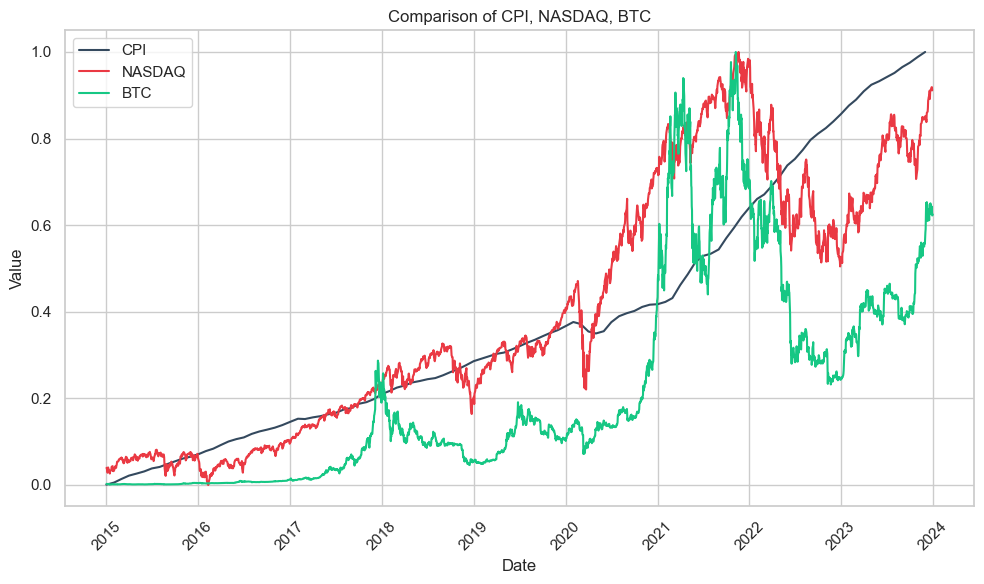

In [17]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=cpi_df['Date'], y=cpi_df['Cpi'], label='CPI', color='#34495e') 
sns.lineplot(x=nasdaq_df['Date'], y=nasdaq_df['Close'], label='NASDAQ', color='#ea3943')  
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')  
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of CPI, NASDAQ, BTC')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### üìå Î∂ÑÏÑù Í≤∞Í≥º
- ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏ÏùÄ Î¨ºÍ∞ÄÏóê ÎπÑÌï¥ Î≥ÄÎèôÏÑ±Ïù¥ ÌÅ∞ Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï£ºÏßÄÎßå Î™®Îëê Ïö∞ÏÉÅÌñ•ÌïòÎäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï£ºÏóàÎã§.

#### ‚ùóÏ£ºÎ™©Ìï¥ÏïºÌï† Ï†ê
- Î¨ºÍ∞ÄÍ∞Ä Ï°∞Ï†ïÏùÑ Î∞õÏùÄ 2020ÎÖÑ Ï¥àÎ∞òÍ∏∞Ïóê ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏ÏùÄ Ìè≠ÎùΩÌñàÎã§.
- Ìè≠ÎùΩ ÌõÑ Ï†ÑÍ≥†Ï†êÏùÑ ÎÑòÏñ¥ÏÑúÎäî ÌÅ∞ Î∞òÎì±Ïù¥ ÏûàÏóàÏúºÎ©∞, Ïù¥ ÏãúÍ∏∞Ïóê Î¨ºÍ∞ÄÏùò ÏÉÅÏäπÏÑ∏Í∞Ä Í∞ÄÌååÎü¨ÏßÄÍ≥† ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏ Î™®Îëê Í∏âÎì±ÌïòÏòÄÎã§.
- Î¨ºÍ∞ÄÎäî Íæ∏Ï§ÄÌûà ÏÉÅÏäπÌïòÏßÄÎßå ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•ÏùÄ 2022ÎÖÑ ÌÅ∞ Ï°∞Ï†ïÏùÑ Î∞õÎäîÎã§.

### 3. NASDAQ, ÎπÑÌä∏ÏΩîÏù∏, Í∏àÎ¶¨ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
- Í∏àÎ¶¨Í∞Ä NASDAQÍ≥º ÎπÑÌä∏ÏΩîÏù∏Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Î†•ÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Ïûê

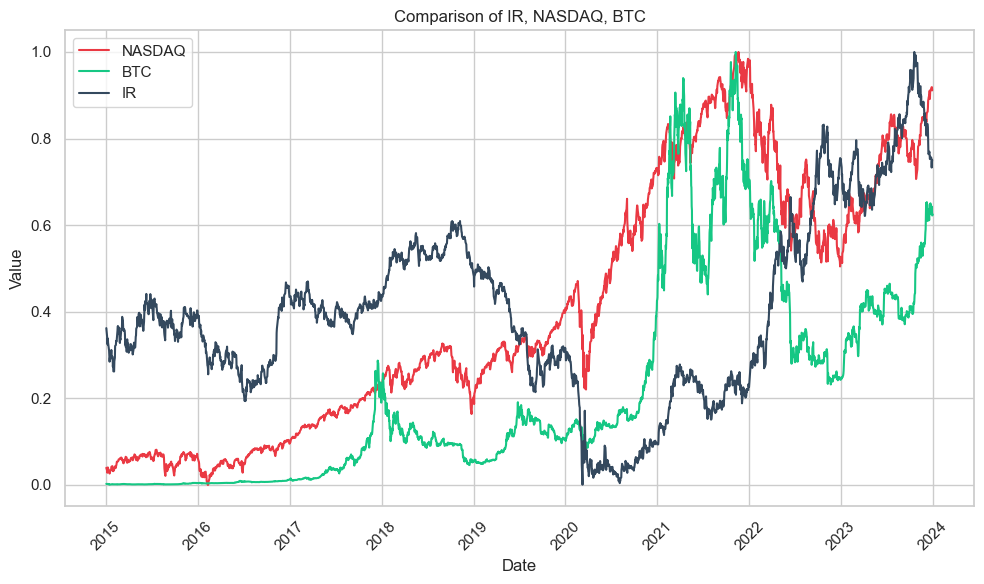

In [18]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=nasdaq_df['Date'], y=nasdaq_df['Close'], label='NASDAQ', color='#ea3943')  
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')  
sns.lineplot(x=ir_df['Date'], y=ir_df['Close'], label='IR', color='#34495e') 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of IR, NASDAQ, BTC')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### üìå Î∂ÑÏÑù Í≤∞Í≥º
- ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏ÏùÄ Ïö∞ÏÉÅÌñ•ÌñàÏßÄÎßå Í∏àÎ¶¨Îäî 2018ÎÖÑ ÎßêÎ∂ÄÌÑ∞ 2020ÎÖÑ Ï¥àÍπåÏßÄ Í≥ÑÏÜç ÌïòÎùΩÌñàÎã§.

#### ‚ùó Ï£ºÎ™©Ìï¥ÏïºÌï† Ï†ê
- Í∏àÎ¶¨Í∞Ä ÏµúÏ†ÄÏ†êÏùÑ ÎèÑÎã¨Ìïú ÏãúÏ†êÏù∏ 2020ÎÖÑÎèÑÏóê ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏ Î™®Îëê Í∏âÎùΩÌñàÎã§.
- Í∏àÎ¶¨Í∞Ä ÏµúÏ†ÄÏ†êÏóê ÎèÑÎã¨Ìïú Ïù¥ÌõÑ 2024ÎÖÑ ÍπåÏßÄ Íæ∏Ï§ÄÌûà ÏÉÅÏäπÌñàÍ≥† ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã• Î™®Îëê ÏÉÅÏäπÌñàÎã§.
- 2022ÎÖÑÎèÑÏóêÎäî Í∏àÎ¶¨ÏôÄ ÎπÑÌä∏ÏΩîÏù∏Ïù¥ ÎîîÏª§ÌîåÎßÅ ÎêòÎäî ÌòÑÏÉÅÏù¥ ÎÇòÌÉÄÎÇ¨Îã§. ÌïòÏßÄÎßå Ïù¥ÌõÑ Ìï®Íªò ÏÉÅÏäπÌñàÎã§.
- 2020ÎÖÑÏùÑ Ï†úÏô∏ÌïòÎ©¥ Í∏àÎ¶¨ÏôÄ ÎÇòÏä§Îã•, ÎπÑÌä∏ÏΩîÏù∏Ïù¥ Î∞òÎåÄÎ°ú ÏõÄÏßÅÏù¥Îäî ÌòÑÏÉÅÏù¥ ÏûêÏ£º Î≥¥Ïù∏Îã§.

**Í∏àÎ¶¨Í≥º ÎÇòÏä§Îã•, ÎπÑÌä∏ÏΩîÏù∏Ïù¥ ÎîîÏª§ÌîåÎßÅ ÎêòÎäî Ïù¥Ïú†Î•º Ìà¨ÏûêÏûêÎì§Ïùò Ìà¨Ïûê Ïã¨Î¶¨Î•º Ï∞∏Í≥†ÌïòÏó¨ Î∂ÑÏÑùÌï¥Î≥¥Ïûê**

### 3. VIXÏßÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ìïú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
- Í∞ÄÏÉÅÏûêÏÇ∞Ïùò Ìà¨ÏûêÏã¨Î¶¨ÏôÄ ÎÇòÏä§Îã•Ïùò Ìà¨Ïûê Ïã¨Î¶¨ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÑÎèÑÎ°ú Íµ¨Ìï†Ïàò ÏóÜÏñ¥ Ìà¨ÏûêÏãúÏû•Ïùò Ìà¨ÏûêÏã¨Î¶¨Î¶¨ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌñàÎã§.
- Ïã§Ï†ú Í∞ÄÏÉÅÏûêÏÇ∞Ïùò Ìà¨ÏûêÏã¨Î¶¨ÏôÄ ÎÇòÏä§Îã•Ïùò Ìà¨ÏûêÏã¨Î¶¨ÏôÄ Îã§Î•ºÏàò ÏûàÎã§Îäî Î∂ÄÎ∂ÑÏùÑ Í∞êÏïàÌï¥ÏïºÌïúÎã§.
- Ìà¨ÏûêÏã¨Î¶¨Î•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÏàòÏù∏ VIXÏßÄÏàòÎ•º ÏãúÍ∞ÅÌôîÌïúÎã§.

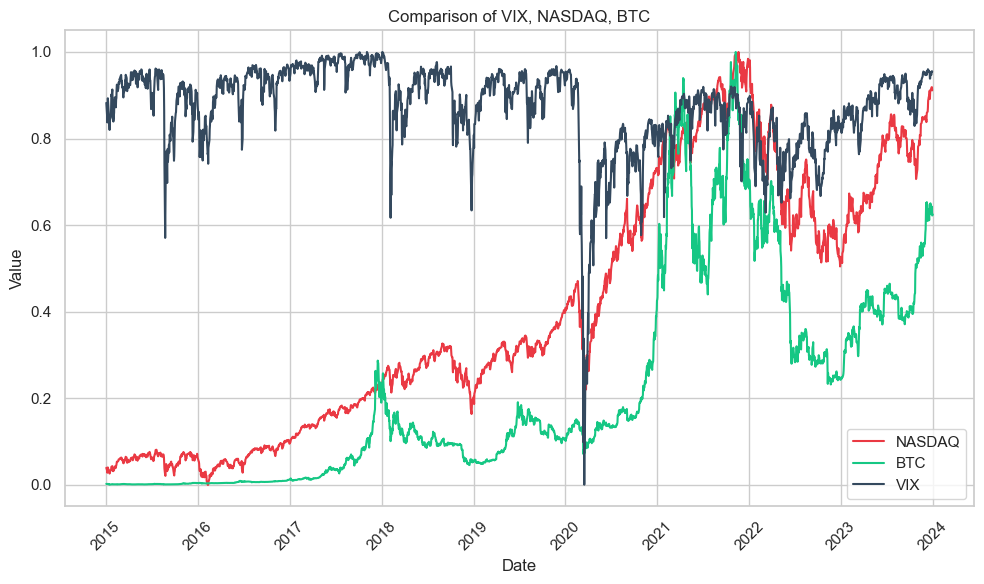

In [19]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=nasdaq_df['Date'], y=nasdaq_df['Close'], label='NASDAQ', color='#ea3943')  
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')  
sns.lineplot(x=vix_df['Date'], y=vix_df['Close'], label='VIX', color='#34495e') 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of VIX, NASDAQ, BTC')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### üìå Î∂ÑÏÑù Í≤∞Í≥º
- ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏Ïù¥ Í∏âÎùΩÌïú 2020ÎÖÑÏóê Ìà¨ÏûêÏã¨Î¶¨ ÎòêÌïú ÍµâÏû•Ìûà ÏúÑÏ∂ïÎêòÏñ¥ ÏûàÎäîÎ™®ÏäµÏùÑ Î≥¥Ïó¨Ï§¨Îã§.
- Ìà¨Ïûê Ïã¨Î¶¨Í∞Ä ÏµúÏ†ÄÏ†êÏùÑ Ï∞çÏùÄ Ïù¥ÌõÑ Îã§Ïãú ÌöåÎ≥µÎêòÎ©¥ÏÑú ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏ÎèÑ Ï†ÑÍ≥†Ï†êÏùÑ ÎèåÌååÌñàÎã§.

**VIX ÏßÄÏàòÏùò Ï∞®Ìä∏Î•º Î¥êÏÑúÎäî ÌäπÏßïÏùÑ Ï∞æÍ∏∞ Ïñ¥Î†µÎã§. Íµ¨Í∞ÑÏùÑ ÎÇòÎà† Îã§Ïãú ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Ïûê**

In [20]:
l1, l2, l3, l4 = np.percentile(vix_df['Close'], [20, 40, 60, 80])
print(l1, l2, l3, l4)

0.8089191042639847 0.8716519468239515 0.9167641093582651 0.9495581246456056


In [21]:
def get_level(x):
    if x <= l1:
        return 'Extreme Fear'
    if x <= l2:
        return 'Fear'
    if x <= l3:
        return 'Neutral'
    if x <= l4:
        return 'Greed'
    return 'Extreme Greed'

In [22]:
vix_df['Level'] = vix_df['Close'].apply(get_level)
vix_df

Date      Open      High       Low     Close  Volume          Level
0    2015-01-02  0.118757  0.142201  0.137356  0.882393     0.0        Neutral
1    2015-01-05  0.138165  0.157300  0.171979  0.853433     0.0           Fear
2    2015-01-06  0.153637  0.178440  0.177318  0.837118     0.0           Fear
3    2015-01-07  0.151194  0.149816  0.169552  0.861727     0.0           Fear
4    2015-01-08  0.121064  0.115284  0.136386  0.892998     0.0        Neutral
...         ...       ...       ...       ...       ...     ...            ...
2259 2023-12-22  0.063925  0.061056  0.071833  0.947111     0.0          Greed
2260 2023-12-26  0.064604  0.058955  0.071186  0.947655     0.0          Greed
2261 2023-12-27  0.054425  0.048976  0.061641  0.955269     0.0  Extreme Greed
2262 2023-12-28  0.046553  0.043855  0.061802  0.954725     0.0  Extreme Greed
2263 2023-12-29  0.048046  0.050945  0.061479  0.954997     0.0  Extreme Greed

[2264 rows x 7 columns]

### 4. VIXÏßÄÏàòÎ•º 5Îì±Í∏âÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
- Ìà¨ÏûêÏã¨Î¶¨Î•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÏàòÏù∏ VIXÏßÄÏàòÎ•º 5Îã®Í≥ÑÎ°ú ÎÇòÎàÑÏñ¥ ÏÑ∏Î∂ÑÌôî ÌïúÎí§ Í∞Å ÎÖÑÎèÑÎßàÎã§ Îã®Í≥ÑÎ≥Ñ ÎπÑÏú®ÏùÑ ÏãúÍ∞ÅÌôîÌïúÎã§.

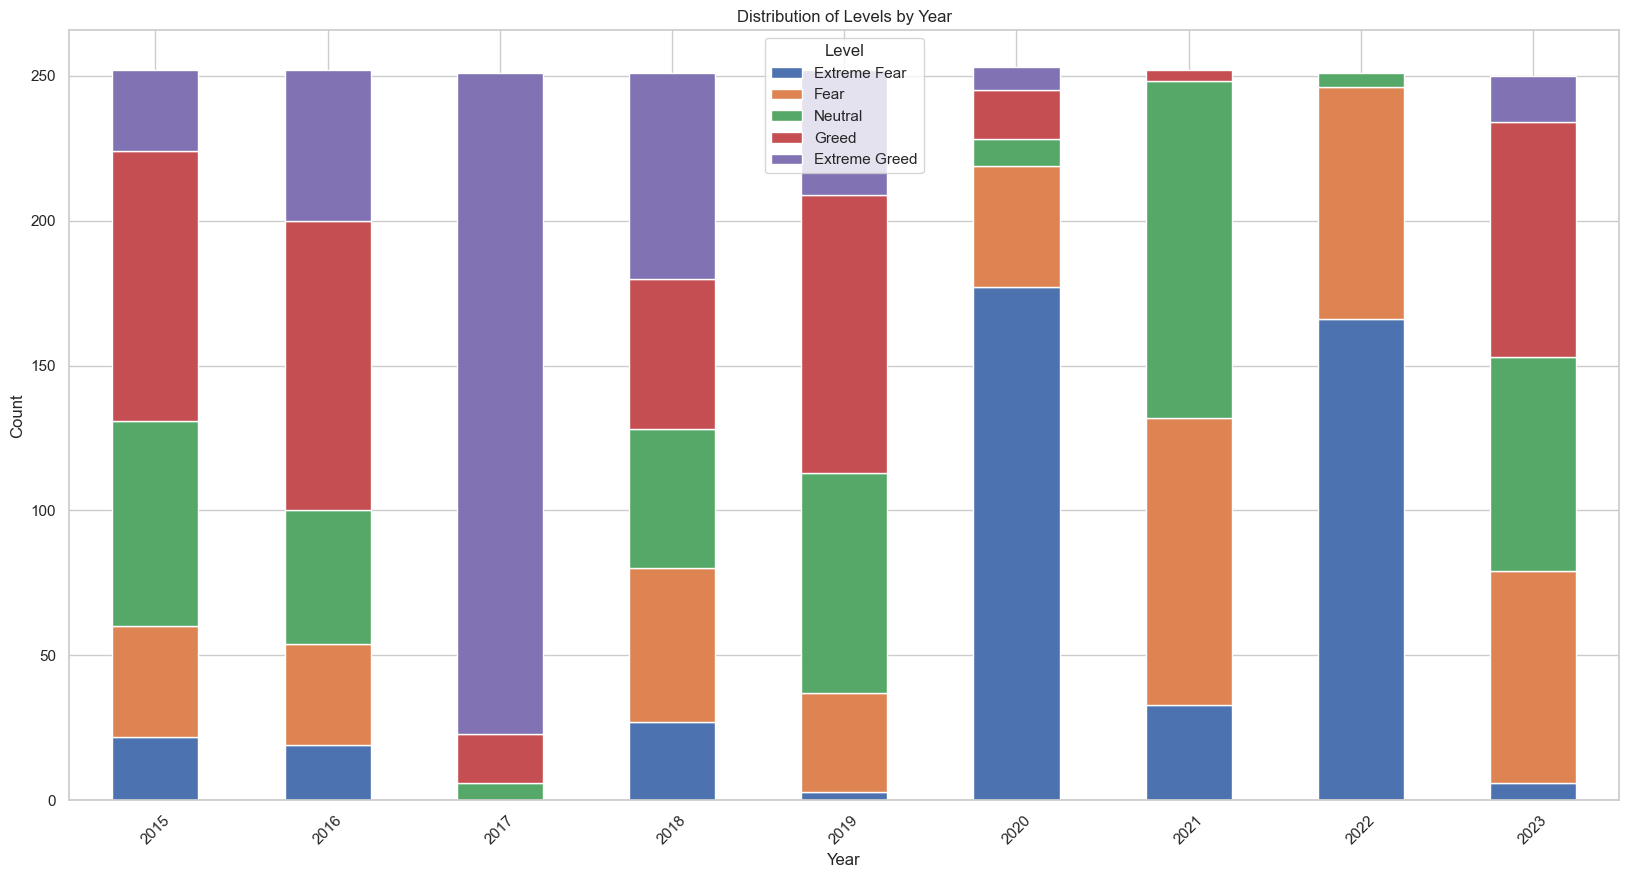

In [23]:
vix_df['Year'] = vix_df['Date'].dt.year

level_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
vix_df['Level'] = pd.Categorical(vix_df['Level'], categories=level_order, ordered=True)
yearly_level_counts = vix_df.groupby(['Year', 'Level']).size().unstack(fill_value=0)
yearly_level_counts = yearly_level_counts[level_order]

yearly_level_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Levels by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Level')
plt.show()

#### üìå Î∂ÑÏÑù Í≤∞Í≥º
- 2019ÎÖÑ Í∏àÎ¶¨Îäî Ïù∏Ìïò ÎêòÏßÄÎßå ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•ÏùÄ ÏÉÅÏäπÌñàÎã§. Ïù¥ Îïå Ìà¨Ïûê Ïã¨Î¶¨Îäî Extreme FearÎì±Í∏â ÎπÑÏ§ëÏù¥ 2020ÎÖÑÎèÑÏóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùåÏúºÎ°ú Í∏çÏ†ïÏ†ÅÏù¥ÏóàÎã§Í≥† Î≥º Ïàò ÏûàÎã§.
- 2022ÎÖÑ Í∏àÎ¶¨Îäî Ïù∏ÏÉÅ ÎêòÏóàÏßÄÎßå ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•ÏùÄ ÌïòÎùΩÌñàÎã§. Ïù¥ Îïå Ìà¨Ïûê Ïã¨Î¶¨Îäî Extreme FearÎì±Í∏âÏù¥ Îã§Î•∏ ÎÖÑÎèÑÏóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùåÏúºÎ°ú Î∂ÄÏ†ïÏ†ÅÏù¥ÏóàÎã§Í≥† Î≥º Ïàò ÏûàÎã§.

### ‚ú® Ï§ëÍ∞Ñ ÏöîÏïΩ
- Í∏àÎ¶¨, Î¨ºÍ∞ÄÍ∞Ä ÌïòÎùΩÌïú 2020ÎÖÑÏóê ÏûêÏÇ∞ ÏãúÏû•Ï§ë ÌïòÎÇòÏù∏ ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏Ïù¥ ÌïòÎùΩÌñàÎã§.
- Í∏àÎ¶¨Îäî Î¨ºÍ∞ÄÏôÄ Îã§Î•¥Í≤å ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎîîÏª§ÌîåÎßÅ ÎêòÎäî Î™®ÏäµÏùÑ Ï¢ÖÏ¢Ö Î≥¥Ïó¨Ï£ºÏóàÎã§.
- Ìà¨Ïûê Ïã¨Î¶¨Î•º Î∂ÑÏÑùÌï¥ Î≥∏ Í≤∞Í≥º Í∏àÎ¶¨Í∞Ä ÌïòÎùΩÌïòÎ©¥ Ìà¨ÏûêÏã¨Î¶¨Í∞Ä Í∏çÏ†ïÏ†ÅÏù¥ÏóàÏúºÎ©∞ Í∏àÎ¶¨Í∞Ä ÌïòÎùΩÌïòÎ©¥ Î∂ÄÏûê Ïã¨Î¶¨Í∞Ä Î∂ÄÏ†ïÏ†ÅÏù¥ÏóàÎã§.
- 2018ÎÖÑ ÎπÑÌä∏ÏΩîÏù∏ÏùÄ Í∏àÎ¶¨, Î¨ºÍ∞ÄÏôÄ Í¥ÄÎ†®ÏóÜÏù¥ Îã®ÎèÖÏúºÎ°ú Í∏âÎì±ÌïòÎäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï£ºÏóàÎã§.
- Î¨ºÍ∞Ä, Í∏àÎ¶¨Í∞Ä Î∞òÎì±Ìï®Ïóê Îî∞Îùº ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•ÎèÑ Ìï®Íªò Î∞òÎì±ÌïòÎäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï£ºÏóàÎã§.

**Îã®ÏàúÌûà ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•Ïùò Í∞ÄÍ≤©Ïù¥ Ïò¨ÎûêÎã§ Î≥¥Îã§Îäî ÏûêÍ∏àÏùò ÌùêÎ¶ÑÏùÑ Î≥¥Î©∞ Ï¢Ä Îçî ÏûêÏÑ∏Ìûà Í∏àÎ¶¨, Î¨ºÍ∞ÄÏôÄ ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï¥Î≥¥Ïûê**

### 5. ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•Ïùò ÏûêÍ∏à Ïú†ÏûÖ

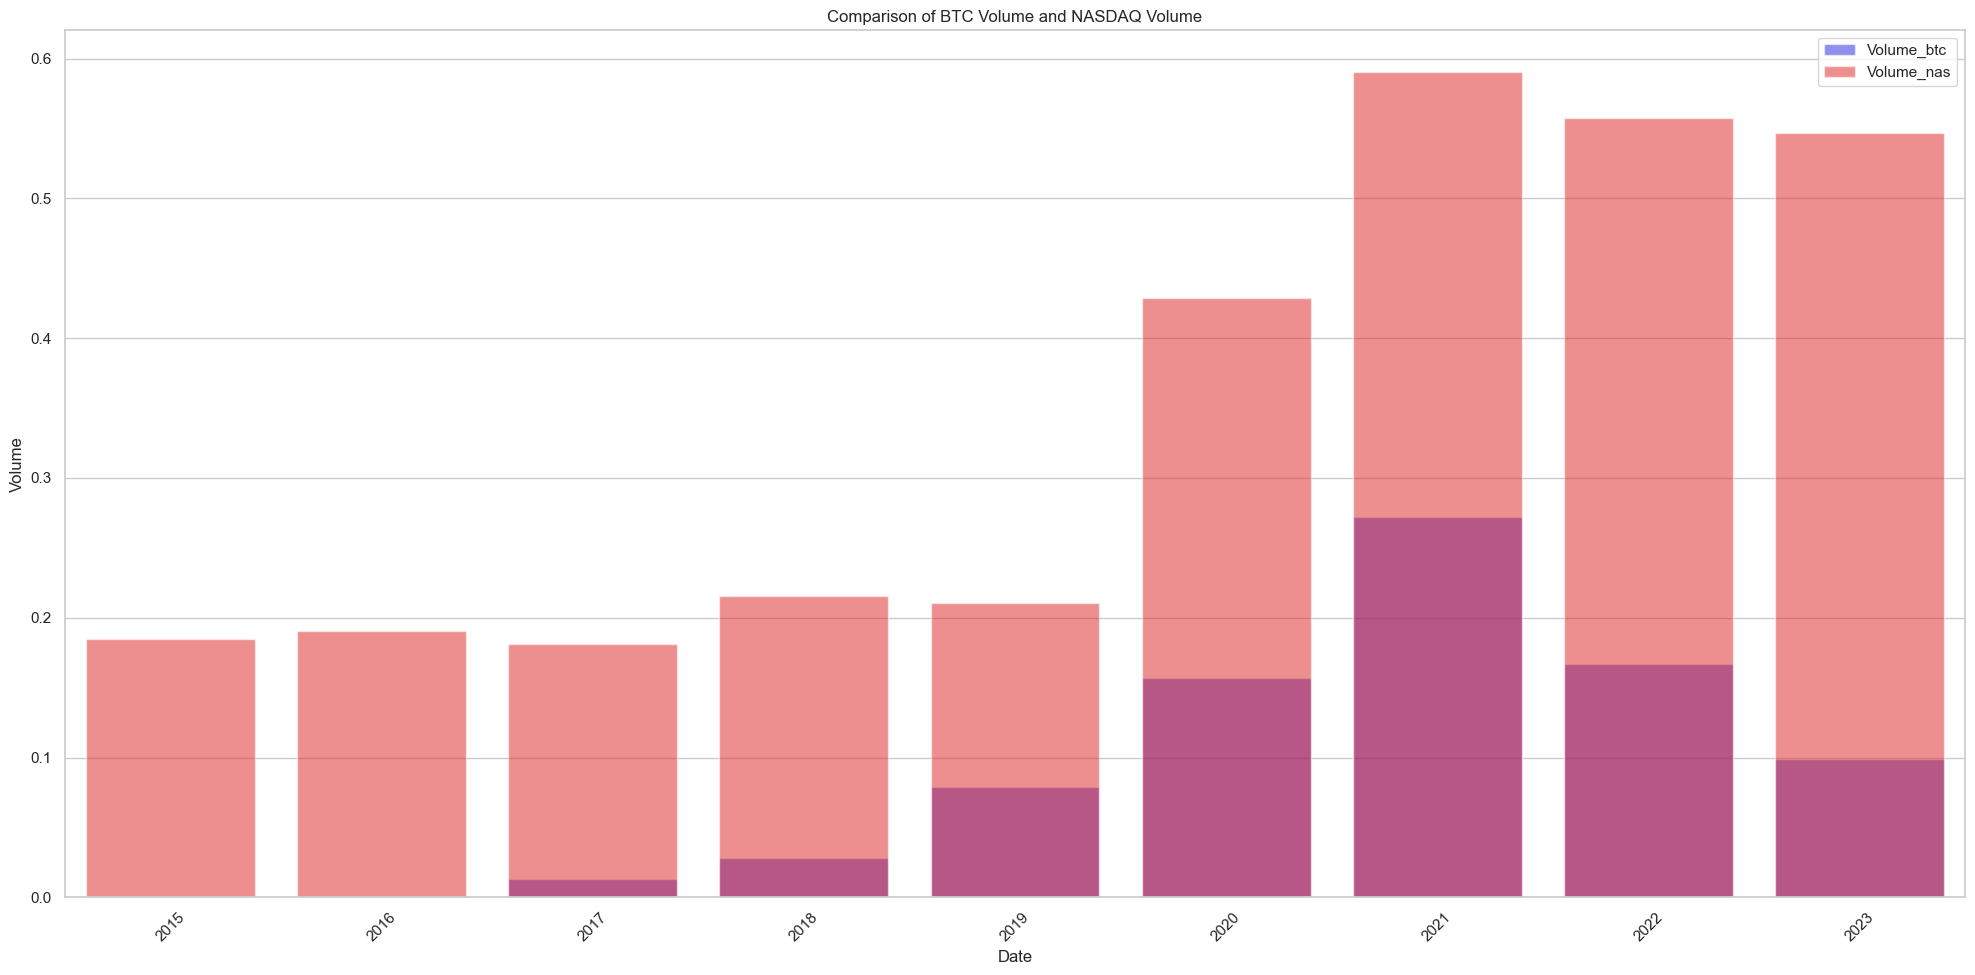

In [31]:
btc_month_df = btc_df.groupby(pd.Grouper(key='Date', freq='MS')).max().reset_index()
nas_month_df = nasdaq_df.groupby(pd.Grouper(key='Date', freq='MS')).max().reset_index()
merge_month_df = pd.merge(btc_month_df, nas_month_df, on='Date', suffixes=('_btc', '_nas'))
merge_month_df['Year'] = merge_month_df['Date'].dt.year
yearly_avg_df = merge_month_df.groupby('Year').mean().reset_index()

plt.figure(figsize=(20, 10))

sns.barplot(data=yearly_avg_df, x='Year', y='Volume_btc', color='blue', alpha=0.5, label='Volume_btc')
sns.barplot(data=yearly_avg_df, x='Year', y='Volume_nas', color='red', alpha=0.5, label='Volume_nas')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Comparison of BTC Volume and NASDAQ Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Î∂ÑÏÑùÍ≤∞Í≥º
- Î¨ºÍ∞Ä, Í∏àÎ¶¨Í∞Ä Ìè≠ÎùΩÌñàÏùÑÎïå ÎßéÏùÄ ÏÇ¨ÎûåÎì§Ïù¥ ÏûêÏÇ∞Ïóê Í¥ÄÏã¨ÏùÑ Í∞ñÍ≤å ÎêòÏóàÍ≥† Ïù¥Îäî Ìà¨Ïûê Ïã¨Î¶¨Ïùò ÌöåÎ≥µÏúºÎ°ú Ïù¥Ïñ¥Ï°åÎã§Í≥† ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§.
- Ìà¨Ïûê Ïã¨Î¶¨Í∞Ä ÌöåÎ≥µÎê®Ïóê Îî∞Îùº ÏûêÏÇ∞ ÏãúÏû•Ï§ë ÌïòÎÇòÏù∏ ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏóê ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§Îã§Í≥† ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§.
- ÌïòÏßÄÎßå ÎπÑÌä∏ÏΩîÏù∏Ïùò Í≤ΩÏö∞ ÎπÑÏ§ëÏù¥ ÌÅ∞Í≤ÉÏùÄ ÏÇ¨Ïã§Ïù¥ÏßÄÎßå ÏΩîÏù∏Ï§ë ÌïòÎÇòÏù¥ÎØÄÎ°ú Ï†ÑÏ≤¥ Í∞ÄÏÉÅÏûêÏÇ∞Ïùò ÏûêÍ∏àÏú†ÏûÖÏùÑ ÌïúÎ≤à ÌôïÏù∏Ìï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÎã§Í≥† ÌåêÎã®ÌñàÎã§.

### 6. ÎπÑÌä∏ÏΩîÏù∏ ÎèÑÎØ∏ÎÑåÏä§ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìï¥ Í∞ÄÏÉÅÏûêÏÇ∞ÏóêÏÑú Í∞Å ÏΩîÏù∏Îì§Ïùò ÎπÑÏ§ë Î≥ÄÌôî Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
- ÎπÑÏ§ë Î≥ÄÌôîÎäî 2019ÎÖÑÍ≥º 2020ÎÖÑÏù¥ ÌÅ¨Í≤å Îã§Î•¥ÏßÄ ÏïäÏïòÎã§.

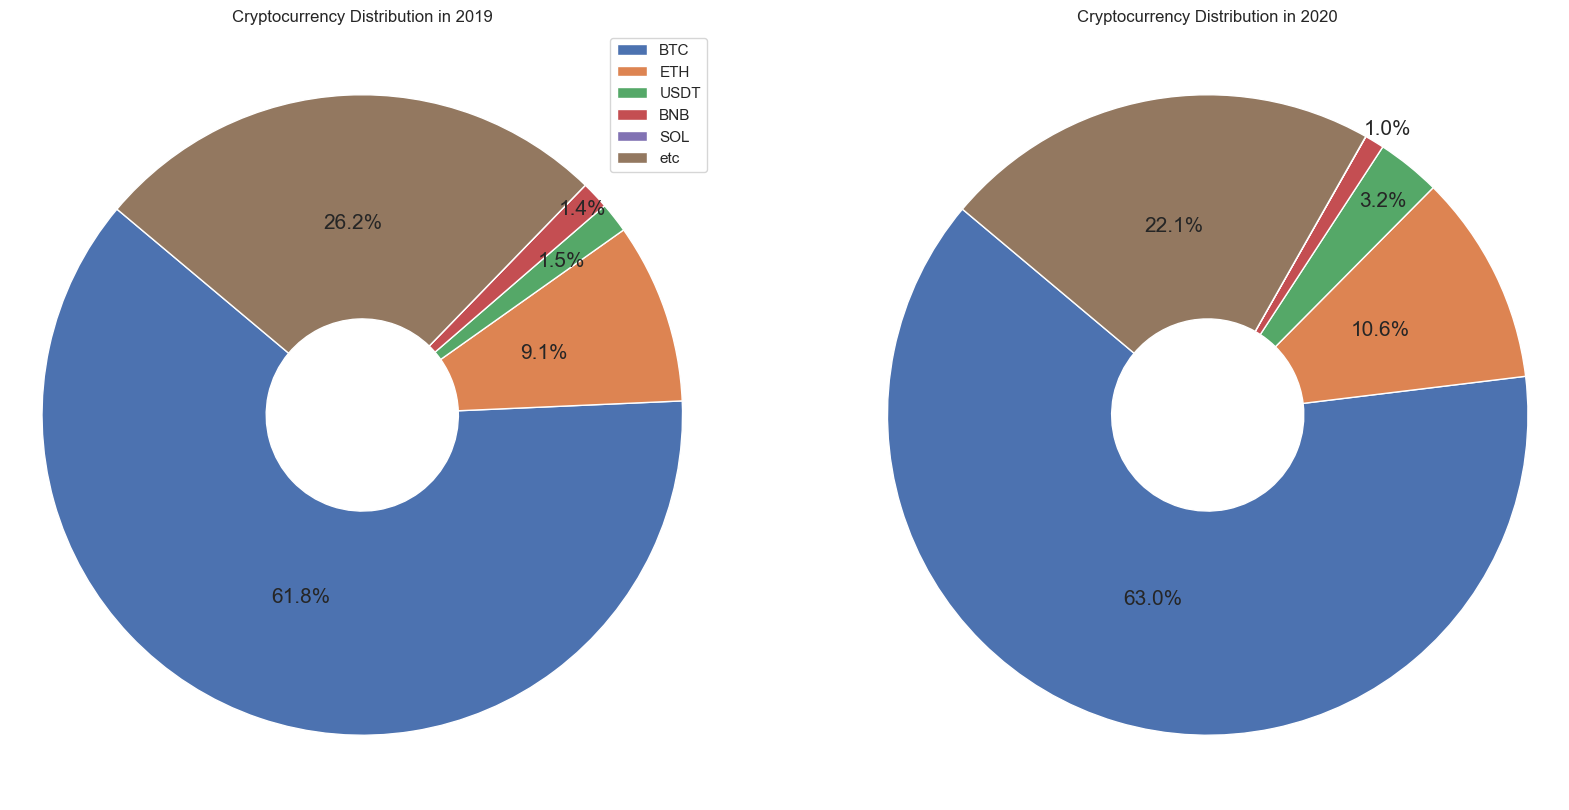

In [25]:

dominance_df_2019 = dominance_df[dominance_df['Date'].dt.year == 2019]
dominance_df_2020 = dominance_df[dominance_df['Date'].dt.year == 2020]


dominance_df_2019 = dominance_df_2019.mean().reset_index()
dominance_df_2019.columns = ['name', 'value']
dominance_df_2019 = dominance_df_2019.drop(0).reset_index()
dominance_df_2019 = dominance_df_2019.drop(columns='index', axis=1)

dominance_df_2020 = dominance_df_2020.mean().reset_index()
dominance_df_2020.columns = ['name', 'value']
dominance_df_2020 = dominance_df_2020.drop(0).reset_index()
dominance_df_2020 = dominance_df_2020.drop(columns='index', axis=1)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) 
labels = dominance_df_2019['name']
sizes = dominance_df_2019['value']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
plt.rcParams['font.size'] = 15
_, _, autotexts_2019 = plt.pie(sizes, autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops)
for i, (label, size) in enumerate(zip(labels, sizes)):
    x, y = autotexts_2019[i].get_position() 
    if i == 2:
        autotexts_2019[i].set_position((x+0.15, y+0.11))
    if i == 3:
        autotexts_2019[i].set_position((x+0.25, y+0.23))
    if i == 4:
        autotexts_2019[i].set_visible(False)
plt.title('Cryptocurrency Distribution in 2019')
plt.legend(dominance_df_2019['name'])
plt.axis('equal')

plt.subplot(1, 2, 2)  
labels = dominance_df_2020['name']
sizes = dominance_df_2020['value']
plt.rcParams['font.size'] = 15
_, _, autotexts_2020 = plt.pie(sizes, autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops)
for i, (label, size) in enumerate(zip(labels, sizes)):
    x, y = autotexts_2020[i].get_position() 
    if i == 2:
        autotexts_2020[i].set_position((x+0.17, y+0.2))
    if i == 3:
        autotexts_2020[i].set_position((x+0.25, y+0.38))
    if i == 4:
        autotexts_2020[i].set_visible(False)
plt.title('Cryptocurrency Distribution in 2020')
plt.axis('equal')
plt.show()

##### ÎπÑÌä∏ÏΩîÏù∏ ÎèÑÎØ∏ÎÑåÏä§ÎûÄ? : Ï†ÑÏ≤¥ ÏΩîÏù∏ÏãúÏû•ÏóêÏÑú ÎπÑÌä∏ÏΩîÏù∏ ÎåÄÎπÑ Îã§Î•∏ ÏΩîÏù∏Îì§Ïùò ÎπÑÏ§ëÏùÑ ÏïåÏïÑÎ≥ºÏàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.

#### üìå Î∂ÑÏÑù Í≤∞Í≥º
- ÎπÑÌä∏ÏΩîÏù∏Ïùò ÎπÑÏ§ëÏù¥ Îçî 1.2% Îçî Ï¶ùÍ∞ÄÌñàÏßÄÎßå, ÌÅ¨Í≤å Ï¶ùÍ∞ÄÌïòÏßÄ ÏïäÏùÄ Ï†êÏùÑ Í≥†Î†§ÌñàÏùÑÎïå Ï†ÑÏ≤¥ ÏûêÏÉÅÏûêÏÇ∞Ïóê Í≥†Î•¥Í≤å ÏûêÍ∏àÏù¥ Ïú†ÏûÖÎêòÏóàÎã§Í≥† ÏòàÏ∏°Ìï¥ Î≥ºÏàò ÏûàÎã§.
- 2020ÎÖÑ ÏΩîÏù∏Ïù¥ Í∏âÎì±ÌñàÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† ÎπÑÌä∏ÏΩîÏù∏Ïùò ÎπÑÏ§ëÏù¥ Í±¥Ï†úÌï®ÏúºÎ°ú Î≥¥ÏïÑ Í≥ÑÏÜç ÎπÑÌä∏ÏΩîÏù∏Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥ÎèÑ Í¥úÏ∞ÆÍ≤†Îã§Í≥† ÌåêÎã®ÌñàÎã§.

### ‚ùì ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•Ïù¥ Í∏âÎùΩ, Í∏âÎì±Ìïú 2020ÎÖÑÏóêÎäî Î¨¥Ïä®ÏùºÏù¥ ÏûàÏóàÏùÑÍπå
#### 2020ÎÖÑ ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ 
- Ï†Ñ ÏÑ∏Í≥Ñ Í±∞Ïùò Î™®Îì† Íµ≠Í∞ÄÏôÄ ÏßÄÏó≠ÏóêÏÑú ÌôïÏßÑÏûêÍ∞Ä Î∞úÏÉùÌïòÎ©∞, Í∞êÏóºÏûê ÏàòÎäî Í∏∞ÌïòÍ∏âÏàòÏ†ÅÏúºÎ°ú ÎäòÏñ¥ÎÇúÎã§.
- Ïù¥Î°úÏù∏Ìï¥ Í±∞Î¶¨ÎëêÍ∏∞, Î¥âÏÉà Ï°∞ÏπòÍ∞Ä ÏãúÌñâ ÎêòÏóàÎã§.
- ÌïôÍµê, ÌöåÏÇ¨, Í≥µÍ≥µ ÏãúÏÑ§Ïùò Ìú¥ÏóÖÍ≥º Î™®ÏûÑ Ï∑®ÏÜåÎì±Ïù¥ Ïù¥Î£®Ïñ¥ Ï°åÎã§.
- Ïù¥Î°úÏù∏Ìï¥ ÎßéÏùÄ ÏÇ∞ÏóÖÍ≥º ÏÇ¨ÏóÖÏù¥ Ï§ëÎã®ÎêòÍ≥†, Ïã§ÏóÖÎ•†Ïù¥ ÏÉÅÏäπÌñàÏúºÎ©∞ Í∏àÏúµÏãúÏû•ÏóêÎäî ÎåÄÌè≠Ï†ÅÏù¥ Î≥ÄÎèôÏù¥ ÏûàÏóàÎã§.

<div style='width:100%; display:flex;'>
    <img src='./images/news1.png' style='width:50%'>
    <img src='./images/news2.png'  style='width:50%'>  
</div>
<div style='width:100%; display:flex;'>
    <img src='./images/news3.png'  style='width:50%'>
    <img src='./images/news4.png'  style='width:50%'>
</div>

In [26]:
region_data_df = covid_df.groupby('Continent').agg({
    'Population': 'sum',
    'TotalCases': 'sum',
    'TotalDeaths': 'sum'
}).reset_index()
region_data_df['CasesRatio'] = (region_data_df['TotalCases'] / region_data_df['Population'])
region_data_df['DeathsRatio'] = (region_data_df['TotalDeaths'] / region_data_df['Population'])
region_data_df['CasesDeathsRatio'] = (region_data_df['TotalDeaths'] / region_data_df['TotalCases'])

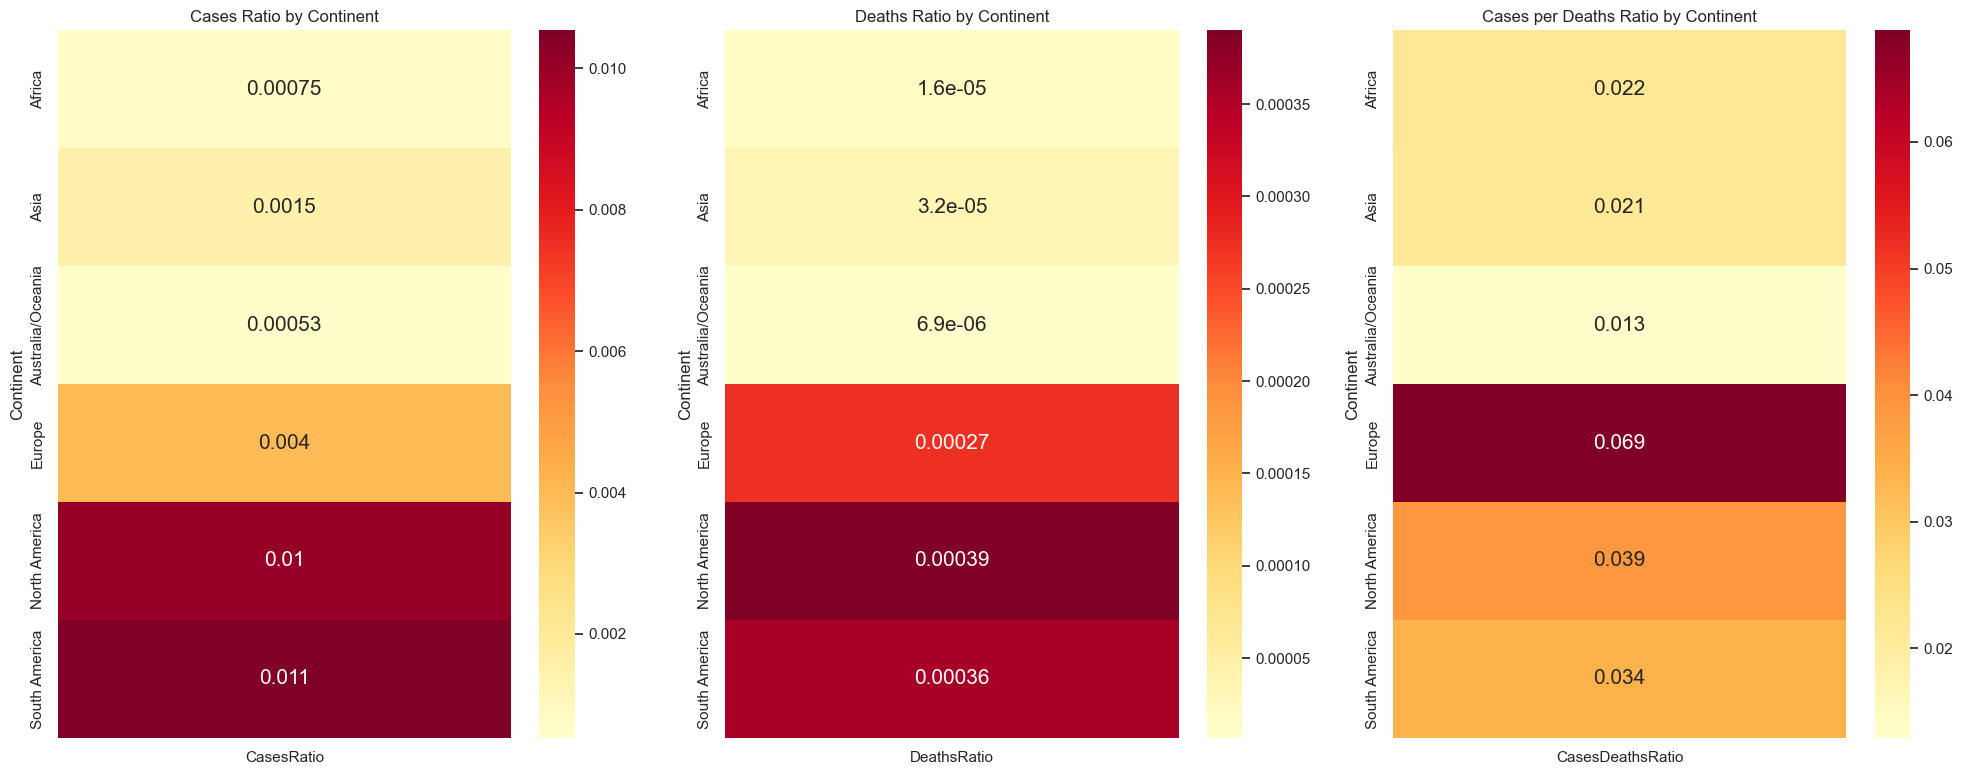

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

pivot_cases_ratio = region_data_df.pivot_table(index='Continent', values='CasesRatio', aggfunc='mean')
sns.heatmap(pivot_cases_ratio, annot=True, cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Cases Ratio by Continent')

pivot_deaths_ratio = region_data_df.pivot_table(index='Continent', values='DeathsRatio', aggfunc='mean')
sns.heatmap(pivot_deaths_ratio, annot=True, cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Deaths Ratio by Continent')

pivot_cases_deaths_ratio = region_data_df.pivot_table(index='Continent', values='CasesDeathsRatio', aggfunc='mean')
sns.heatmap(pivot_cases_deaths_ratio, annot=True, cmap='YlOrRd', ax=axes[2])
axes[2].set_title('Cases per Deaths Ratio by Continent')

plt.tight_layout()
plt.show()

#### üìå Î∂ÑÏÑù Í≤∞Í≥º
- Î™®Îì† ÎåÄÎ•ôÏóêÏÑú ÌôïÏßÑÏûêÏôÄ ÌôïÏßÑ ÌõÑ ÏÇ¨ÎßùÏûêÍπåÏßÄ Ï°¥Ïû¨Ìï®ÏúºÎ°ú Ï†ÑÏÑ∏Í≥ÑÏ†ÅÏúºÎ°ú ÏΩîÎ°úÎÇòÍ∞Ä Ïú†ÌñâÌñàÏùåÏùÑ ÏïåÏàò ÏûàÎã§.
- ÏïÑÎ©îÎ¶¨Ïπ¥, Ïú†ÎüΩ ÎåÄÎ•ôÏù¥ ÌÅ∞ ÌÉÄÍ≤©ÏùÑ ÏûÖÏóàÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏ∏°ÎêúÎã§.

#### Ï£ºÎ™©Ìï¥ÏïºÌï† Ï†ê
- ÏÑ†ÏßÑÍµ≠Îì§Ïù¥ ÌÉÄÍ≤©ÏùÑ ÌÅ¨Í≤å ÏûÖÏóàÏúºÎØÄÎ°ú Í≤ΩÏ†úÍ∞Ä Ï¢ãÏßÄ ÏïäÏïòÏùåÏùÑ ÏòàÏ∏° Ìï†Ïàò ÏûàÎã§.

### ‚ùìÍ∑∏Î†áÎã§Î©¥ ÏΩîÎ°úÎÇòÍ∞Ä Í∏àÎ¶¨, Î¨ºÍ∞ÄÎ•º ÏõÄÏßÅÏù¥Í≤å ÎßåÎì† ÏöîÏù∏ÏùÄ Î¨¥ÏóáÏùºÍπå

1. Í∏àÎ¶¨Ïóê ÎåÄÌïú ÏòÅÌñ•
>- Í≤ΩÏ†úÌôúÎèôÏù¥ ÎëîÌôîÎêòÍ≥† Ïã§ÏóÖÎ•†Ïù¥ Í∏âÏ¶ùÌïòÎ©¥ÏÑú Ï§ëÏïôÏùÄÌñâÎì§ÏùÄ Í∏àÎ¶¨Î•º ÎÇÆÏ∂îÏñ¥ Í∏∞ÏóÖÍ≥º Í∞ÄÍ≥ÑÍ∞Ä Ï†ÄÎ†¥Ìïú Í∏àÎ¶¨Î°ú ÎåÄÏ∂úÏùÑ Î∞õÏùÑ Ïàò ÏûàÎèÑÎ°ù Ìï®ÏúºÎ°úÏç® Í≤ΩÏ†úÎ•º Î∂ÄÏñëÌïòÎ†§Í≥† ÌñàÎã§.
>- Í≤ΩÏ†ú ÏïàÏ†ïÌôîÎ•º ÌïòÍ∏∞ ÏúÑÌï¥ ÎßéÏùÄ ÏùÄÌñâÎì§Ïù¥ ÎåÄÍ∑úÎ™® ÏûêÏÇ∞ Îß§ÏûÖ ÌîÑÎ°úÍ∑∏Îû®ÏùÑ ÌÜµÌï¥ ÏûêÏÇ∞ ÏãúÏû•Ïóê Ïú†ÎèôÏÑ±ÏùÑ Í≥µÍ∏âÌïòÏòÄÎã§.

2. Î¨ºÍ∞ÄÏóê ÎåÄÌïú ÏòÅÌñ•
>- ÎßéÏùÄ ÎÇòÎùºÎì§Ïù¥ Î¥âÏáÑ Í¥ÄÎ†® Ï°∞ÏπòÎ•º ÏãúÌñâÌïòÎ©¥ÏÑú ÏÜåÎπÑÏûê ÏàòÏöîÍ∞Ä Í∏âÍ≤©Ìûà Ï§ÑÏñ¥Îì§ÏóàÎã§.
>- Í∏ÄÎ°úÎ≤å Í≥µÍ∏âÎßùÏù¥ Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∞Î©¥ÏÑú ÏùºÎ∂Ä ÏÉÅÌíàÍ≥º ÏÑúÎπÑÏä§Ïùò Í≥µÍ∏âÏù¥ Í∞êÍ≥†ÌïòÏòÄÎã§. Ïù¥Î°úÏù∏Ìï¥ ÌäπÏ†ï ÌíàÎ™©Ïùò Í∞ÄÍ≤©Ïù¥ ÏÉÅÏäπÌïòÎäî ÏõêÏù∏Ïù¥ ÎêòÏóàÎã§.
>- ÎßéÏùÄ ÎÇòÎùºÎì§Ïù¥ ÎåÄÍ∑úÎ™® Ïû¨ÎÇúÏßÄÏõê Ï†ïÏ±ÖÏùÑ ÌéºÏ≥§Í≥† Ïù¥Î°ú Ïù∏Ìï¥ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏù¥ Î∞úÏÉùÌïòÍ≤å ÎêòÏóàÎã§.


3. ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ Ïù¥ÌõÑ Í≤ΩÏ†ú ÌöåÎ≥µ
>- Ïù∏ÌîåÎ†àÏù¥ÏÖòÏùÑ Ïû°Í∏∞ ÏúÑÌï¥ ÎÇÆÏ∂îÏóàÎçò Í∏àÎ¶¨Î•º ÌÅ∞Ìè≠ÏúºÎ°ú Ïù∏ÏÉÅÌïòÍ∏∞ ÏãúÏûëÌñàÎã§.

### üìù Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º Î≥¥Í≥†ÏÑú
 
### ‚úî ÏöîÏïΩ

#### 1Ô∏è‚É£ ÏΩîÎ°úÎÇò ÌéúÎç∞ÎØπÏúºÎ°ú Ïù∏Ìïú Í≤ΩÏ†úÏ†Å ÌÉÄÍ≤©
- 2020ÎÖÑ ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπÏúºÎ°ú Ïù∏Ìï¥ Ïã§ÏóÖÎ•†Ïù¥ Ï¶ùÍ∞ÄÌïòÍ≥† ÏÇ∞ÏóÖÍ≥º ÏÇ¨ÏóÖÏù¥ Ï§ëÎã®ÎêòÎäî Îì± Í≤ΩÏ†úÍ∞Ä Îπ†Î•¥Í≤å ÏïÖÌôîÎêòÍ∏∞ ÏãúÏûëÌïúÎã§.
- Ïù¥Î°ú Ïù∏Ìï¥ ÎßéÏùÄ Í∏∞ÏóÖÎì§Ïù¥ Ïã§Ï†ÅÏù¥ ÏïÖÌôî ÎêòÏóàÏúºÎ©∞ Ï£ºÍ∞ÄÍ∞Ä ÌïòÎùΩÌïòÍ≥† Ï£ºÏãùÍ≥º ÏΩîÏù∏Î≥¥Îã§ ÏïàÏ†ÑÌïú ÌòÑÍ∏àÏúºÎ°ú Í¥ÄÏã¨Ïù¥ Ïè†Î¶¨Î©∞ ÏûêÏÇ∞Ïùò Í∞ÄÍ≤©Ïù¥ ÌïòÎùΩÌïòÍ≤å ÎêúÎã§.

#### 2Ô∏è‚É£ Í≤ΩÏ†ú ÏïàÏ†ïÌôî ÏãúÎèÑ
- ÎßéÏùÄ Íµ≠Í∞ÄÎì§Ïù¥ Í≤ΩÏ†úÎ•º ÏÇ¥Î¶¨Í∏∞ ÏúÑÌï¥ Ï†ÄÍ∏àÎ¶¨ Ï†ïÏ±ÖÏùÑ Ïã§ÌñâÌï¥ ÎåÄÏ∂úÏùÑ ÌôúÏÑ±Ìôî ÌïòÏòÄÎã§. Ïù¥Îïå Í∏àÎ¶¨Í∞Ä 0%Ïóê ÏàòÎ†¥ÌïòÍ≤å ÎêúÎã§.
- Ïû¨ÎÇúÏßÄÏõê Ï†ïÏ±ÖÏóê ÎåÄÍ∑úÎ™® ÏûêÍ∏àÏù¥ Ìà¨ÏûÖÎêòÏóàÏúºÎ©∞, ÏãúÏ§ëÏóê ÎßéÏùÄ ÌôîÌèêÍ∞Ä ÌíÄÎ¶¨Í≤å ÎêúÎã§.
- Ïù¥Î°ú Ïù∏Ìï¥ ÌôîÌèêÏùò Í∞ÄÏπòÍ∞Ä ÌïòÎùΩÌïòÍ≤å ÎêòÍ≥† ÎåÄÏ§ëÎì§ÏùÄ ÏûêÏã†Ïù¥ Î≥¥Ïú†Ìïú ÌôîÌèê Í∞ÄÏπòÏùò ÌïòÎùΩÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ ÏûêÏÇ∞Ïóê Ìà¨ÏûêÌïòÍ∏∞ ÏãúÏûëÌïúÎã§.

#### 3Ô∏è‚É£ Î¨ºÍ∞Ä, Í∏àÎ¶¨ Î≥ÄÎèô
- ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπÏúºÎ°ú Ïù∏Ìï¥ Í≤ΩÏ†úÍ∞Ä ÏïÖÌôî ÎêòÏóàÏùÑ Îïå Ï†ÄÍ∏àÎ¶¨Î°ú ÎåÄÏ∂úÏùÑ Ïú†ÎèÑÌñàÎã§. Ïù¥ Í≥ºÏ†ïÏóêÏÑú Í∏àÎ¶¨Í∞Ä ÎåÄÌè≠ Ïù∏ÌïòÎêúÎã§.
- Í≤ΩÏ†ú ÏïàÏ†ïÌôîÎ•º ÏãúÎèÑÌïòÎ©∞ ÏãúÏ§ëÏóê ÎßéÏùÄ ÌôîÌèêÎ•º Ìà¨ÏûÖÌïúÎã§. Ïù¥ Í≥ºÏ†ïÏóêÏÑú ÌôîÌèêÍ∞ÄÏπò ÌïòÎùΩÏúºÎ°ú Ïù∏Ìïú Î¨ºÍ∞ÄÍ∞Ä ÏÉÅÏäπÌïúÎã§.
- ÏãúÏ§ëÏóê ÎÑàÎ¨¥ ÎßéÏùÄ ÌôîÌèêÎ•º Ìà¨ÏûÖÌïòÍ≤å ÎêòÏûê Ïù∏ÌîåÎ†àÏù¥ÏÖòÏù¥ Î∞úÏÉùÌïúÎã§. Í∞Å Íµ≠Í∞ÄÎì§ÏùÄ ÏãúÏ§ëÏóê Ìà¨ÏûÖÌïú ÌôîÌèêÎ•º Îã§Ïãú Í±∞Îë¨Îì§Ïù¥Í≥†, Ïù∏ÌîåÎ†àÏù¥ÏÖòÏùÑ ÎßâÍ∏∞ÏúÑÌï¥ Í∏àÎ¶¨Î•º ÎåÄÌè≠ ÏÉÅÏäπÏãúÌÇ®Îã§.

#### 4Ô∏è‚É£ ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•Ïùò Î≥ÄÌôî
- 2018ÎÖÑ ÎπÑÌä∏ÏΩîÏù∏Ïù¥ Îã®ÎèÖÏúºÎ°ú Í∏âÎì±ÌïòÎäî ÌòÑÏÉÅÏù¥ Î∞úÏÉùÌïúÎã§. ÌïòÏßÄÎßå Í∏àÎ¶¨ÏôÄ Î¨ºÍ∞ÄÎäî Ï†ÑÌòÄ ÏÉÅÍ¥ÄÏóÜÎäî Ï†ëÍ∑ºÏÑ± Ïù¥ÏäàÎ°ú Ïù∏Ìï¥ Î∞úÏÉùÌïú ÌòÑÏÉÅÏù¥ ÏóàÎã§.
- 2019ÎÖÑÎ∂ÄÌÑ∞ ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπÏúºÎ°ú Í≤ΩÏ†úÍ∞Ä ÏïÖÌôîÎêòÏûê Í∏àÎ¶¨Í∞Ä ÌïòÎùΩÌïúÎã§. Ï†ÄÍ∏àÎ¶¨Î°ú Ï†ÄÏ∂ïÏùò Ïù¥ÏûêÍ∞Ä ÎÇÆÏïÑÏßÄÏûê ÏûêÏÇ∞Ï§ë ÌïòÎÇòÏù∏ ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•Ïùò Í∞ÄÍ≤©Ïù¥ ÏÉÅÏäπÌïúÎã§. ÌïòÏßÄÎßå ÎßéÏùÄ ÏûêÍ∏àÏù¥ Ïú†ÏûÖÎêòÏßÄ ÏïäÏïòÎã§.
- 2020ÎÖÑ Í≤ΩÏ†ú ÏïàÏ†ïÌôî ÏãúÎèÑÎ°ú Í∏àÎ¶¨Í∞Ä Ìè≠ÎùΩÌïòÍ≥† Î¨ºÍ∞ÄÍ∞Ä Ìè≠ÎùΩÌïúÎã§. Ïù¥ Îïå Ìà¨Ïûê Ïã¨Î¶¨Í∞Ä ÏµúÏ†ÄÏ†êÏùÑ Í∞±Ïã†Ìï®Í≥º ÎèôÏãúÏóê ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã• ÎòêÌïú Ìè≠ÎùΩÌïúÎã§. Ìà¨Ïûê Ïã¨Î¶¨Î•º Í∑ºÍ±∞Î°ú Í∏àÎ¶¨ÏôÄ Î¨ºÍ∞ÄÎ°ú Ïù∏Ìïú ÏòÅÌñ• Î≥¥Îã§Îäî Í≤ΩÏ†ú Ïπ®Ï≤¥ Ïö∞Î†§Î°ú Ïù∏Ìïú ÌòÑÍ∏àÌôî(Ìà¨ÏûêÏã¨Î¶¨ ÏúÑÏ∂ï)Î°ú ÏòàÏ∏°ÎêúÎã§.
- ÎÑàÎ¨¥ ÎßéÏùÄ Ïû¨ÎÇú ÏßÄÏõêÍ∏à Ìà¨ÏûÖÏúºÎ°ú ÌôîÌèêÍ∞ÄÏπòÍ∞Ä ÎÇÆÏïÑÏßÄÍ≥† Ï†ÄÍ∏àÎ¶¨Î°ú Ïù∏Ìï¥ Ï†ÄÏ∂ïÏúºÎ°ú Î¨ºÍ∞Ä ÏÉÅÏäπÏùÑ Îî∞ÎùºÍ∞à Ïàò ÏóÜÏûê ÏûêÏÇ∞ Ìà¨ÏûêÍ∞Ä ÎßéÏùÄ Í¥ÄÏã¨ÏùÑ Î∞õÎäîÎã§. Ïù¥ Í¥ÄÏã¨ÏùÄ ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã•Ïùò Í±∞ÎûòÎüâÏùÑ Î≥¥ÏïÑ Ïã§Ï†úÎ°ú Ìà¨ÏûêÎ°ú Ïù¥Ïñ¥Ï°åÎã§Í≥† ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§. ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏Ïùò ÏÉÅÏäπÏùÑ Í≤¨Ïù∏ÌñàÎã§Í≥† ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§.
- Í∞Å Íµ≠Í∞ÄÎì§ÏùÄ ÎÜíÏïÑÏßÑ Î¨ºÍ∞ÄÎ•º Î∞îÎ°ú Ïû°Í∏∞ÏúÑÌï¥ Í∏àÎ¶¨Î•º Í≥ÑÏÜçÌï¥ÏÑú Ïù∏ÏÉÅÌïúÎã§. 2022ÎÖÑÏóê 2020ÎÖÑÍ≥º 2021ÎÖÑÎ≥¥Îã§ ÎπÑÌä∏ÏΩîÏù∏Í≥º ÎÇòÏä§Îã• Î™®Îëê Í±∞ÎûòÎüâÏù¥ Ï†êÏ∞® Í∞êÏÜåÌïòÍ≥† ÏûàÏóàÎçò Ï†êÏúºÎ°ú Î≥¥ÏïÑ Í≥†Í∏àÎ¶¨Î°ú Ïù∏Ìï¥ Ï†ÄÏ∂ïÏù¥ Îã§Ïãú Ïù∏Í∏∞Î•º ÏñªÍ≤å ÎêòÍ≥† ÎÜíÏïÑÏßÑ Í∞ÄÍ≤©ÏúºÎ°ú Ïù∏Ìï¥ ÏàòÏùµÏ∞ΩÏ∂úÏù¥ Î∞úÏÉùÌïòÎ©¥ÏÑú Ï°∞Ï†ïÏùÑ Î∞õÏùÄ Í≤ÉÏúºÎ°ú ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§.

### üî¥ Í≤∞Î°†
- Í∏àÎ¶¨Îäî Ï£ºÏãù ÏãúÏû•Í≥º Í∞ÄÏÉÅÏûêÏÇ∞ ÏãúÏû•Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§. Ï†ÄÍ∏àÎ¶¨ ÌôòÍ≤ΩÏóêÏÑúÎäî Ï†ÄÏ∂ïÏùò Ïù¥ÏûêÍ∞Ä ÎÇÆÏïÑÏ†∏ ÏûêÏÇ∞ Ìà¨ÏûêÏóê ÎåÄÌïú Í¥ÄÏã¨Ïù¥ Ï¶ùÍ∞ÄÌïòÍ≥†, Ïù¥Îäî Ï£ºÏãùÍ≥º Í∞ÄÏÉÅÏûêÏÇ∞Ïùò Í∞ÄÍ≤© ÏÉÅÏäπÏúºÎ°ú Ïù¥Ïñ¥ÏßÑÎã§. Î∞òÎ©¥, Í∏àÎ¶¨Í∞Ä Ïù∏ÏÉÅÎêòÎ©¥ Ï†ÄÏ∂ïÏù¥ Îß§Î†•Ï†ÅÏúºÎ°ú ÎêòÏñ¥ ÏûêÏÇ∞ ÏãúÏû•ÏóêÏÑú ÏûêÍ∏àÏù¥ Îπ†Ï†∏ÎÇòÍ∞ÄÎ©¥ÏÑú Í∞ÄÍ≤©Ïù¥ ÌïòÎùΩÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.
- 2020ÎÖÑ ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπ Ïù¥ÌõÑ Í∏àÎ¶¨Í∞Ä ÏµúÏ†ÄÏ†êÏùÑ Ï∞çÏóàÏùÑ Îïå ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏ÏùÄ Î™®Îëê Í∏âÎùΩ ÌñàÏúºÎÇò, Ïù¥ÌõÑ Í∏àÎ¶¨Í∞Ä ÏÉÅÏäπÌïòÎ©¥ÏÑú Îëê ÏãúÏû•ÎèÑ Ìï®Íªò ÏÉÅÏäπÌïòÏòÄÎã§. Í∑∏Îü¨ÎÇò Í≥†Í∏àÎ¶¨ ÌôòÍ≤ΩÏóêÏÑúÎäî ÏûêÏÇ∞ ÏãúÏû•Ïù¥ Ï°∞Ï†ïÏùÑ Î∞õÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏóàÎã§.
- Î¨ºÍ∞Ä ÏÉÅÏäπÏùÄ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏùÑ ÏùòÎØ∏ÌïòÎ©∞, Ïù¥Îäî Ìà¨ÏûêÏûêÎì§Ïù¥ ÌòÑÍ∏àÏùò Í∞ÄÏπòÎ•º Î≥¥Ï†ÑÌïòÍ∏∞ ÏúÑÌï¥ ÏûêÏÇ∞ÏúºÎ°ú Ïù¥ÎèôÌïòÍ≤å ÎßåÎì†Îã§. 2020ÎÖÑ Ìå¨Îç∞ÎØπ Ïù¥ÌõÑ Í≤ΩÏ†ú ÏïàÏ†ïÌôî Í≥ºÏ†ïÏóêÏÑú ÏãúÏ§ëÏóê ÎßéÏùÄ ÌôîÌèêÍ∞Ä ÌíÄÎ¶¨Î©¥ÏÑú Ïù∏ÌîåÎ†àÏù¥ÏÖòÏù¥ Î∞úÏÉùÌñàÍ≥†, Ïù¥Îäî ÎÇòÏä§Îã•Í≥º ÎπÑÌä∏ÏΩîÏù∏ Í∞ÄÍ≤© ÏÉÅÏäπÏúºÎ°ú Ïù¥Ïñ¥Ï°åÎã§.
- Í∑∏Îü¨ÎÇò Ïù∏ÌîåÎ†àÏù¥ÏÖòÏùÑ ÏñµÏ†úÌïòÍ∏∞ ÏúÑÌï¥ Í∏àÎ¶¨Í∞Ä Ïù∏ÏÉÅÎêòÎ©¥ÏÑú ÏûêÏÉÅ ÏãúÏû•Ïùò Ï°∞Ï†ïÏù¥ ÎÇòÌÉÄÎÇ¨ÏúºÎ©∞, Ïù¥Îäî Ï£ºÏãùÍ≥º ÎπÑÌä∏ÏΩîÏù∏Ïùò Í∞ÄÍ≤© Î≥ÄÎèôÏÑ±ÏúºÎ°ú Ïù¥Ïñ¥Ï°åÎã§.

**Îî∞ÎùºÏÑú Í∏àÎ¶¨, Î¨ºÍ∞ÄÏùò Î≥ÄÎèôÏùÄ Ï£ºÏãùÏãúÏû•Í≥º Í∞ÄÏÉÅÏûêÏÇ∞ ÏãúÏû•Ïùò Í∞ÄÍ≤© ÌùêÎ¶ÑÏóê Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ ÌïòÎ©∞, Ïù¥Î•º Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÎäî Í≤ÉÏù¥ ÏãúÏû•Ïùò Î≥ÄÎèôÏÑ±ÏùÑ Ïù¥Ìï¥ÌïòÎäîÎç∞ ÌïÑÏàòÏ†ÅÏù¥Îã§.**